## Final Project Submission

Please fill out:
* Student name: Tara Mullin
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: Victor Geislinger 
* Blog post URL:


## Business Understanding - Defining Objectives & Problem

* **Goal** : Predict the housing prices based on features in the dataset, understand how factors influence price to determine which are most impactful

#1) Understand the problem. Look at each variable and perform analysis to their understand importance for the goal
#2) Univariable study. focus on the dependent variable ('price') to try to know a little bit more about it
#3) Bivariate and multivariate study. analyze how the dependent variable and independent variables relate

### Import Python Libraries needed for project

In [4]:
import pandas as pd #data processing
from pandas.tools.plotting import scatter_matrix #data processing, scatter matrix
import numpy as np #linear algebra
import statsmodels as sm #python module that provides classes and functions for the estimation of many different stats models, conducting statistical test, and statistical data exploration
from statsmodels.api import formula
%matplotlib inline
import matplotlib.pyplot as plt #plotting
import seaborn as sns #data visualization

## 1) Obtain Data

* gather and scrape the data necessary for the project, for example:
    * query from database or API
    * extract from another file
    * generate data

### Import, read and analyze the dataset (df)

In [3]:
df = pd.read_csv('kc_house_data.csv')

## 2) Data Cleaning

* Fix inconsistencies within the data and handle the missing values.

    * examine datatypes
    * find missing values (null values)
    * look for filler/placeholder data
    * columns we don't need --> extra indices
    * drop sparse columns
    
    * filtering lines
    * extracting columns
    * replacing values
    * handle missing values
    * converting formates


In [5]:
df.info

<bound method DataFrame.info of                id        date      price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014   221900.0         3       1.00         1180   
1      6414100192   12/9/2014   538000.0         3       2.25         2570   
2      5631500400   2/25/2015   180000.0         2       1.00          770   
3      2487200875   12/9/2014   604000.0         4       3.00         1960   
4      1954400510   2/18/2015   510000.0         3       2.00         1680   
5      7237550310   5/12/2014  1230000.0         4       4.50         5420   
6      1321400060   6/27/2014   257500.0         3       2.25         1715   
7      2008000270   1/15/2015   291850.0         3       1.50         1060   
8      2414600126   4/15/2015   229500.0         3       1.00         1780   
9      3793500160   3/12/2015   323000.0         3       2.50         1890   
10     1736800520    4/3/2015   662500.0         3       2.50         3560   
11     9212900260   5/27/2014   

In [6]:
df.shape #analyzing the number of rows and columns in the data set

(21597, 21)

The dataframe has 21 columns and 21,597 rows.

In [7]:
df.head() #check out the first 5 rows of the dataframe

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
df.describe() #check out the descriptive statistics of each column in the dataframe

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Immediately I'm noticing that max bedrooms is 33. This seems unlikely, so let's investigate more.

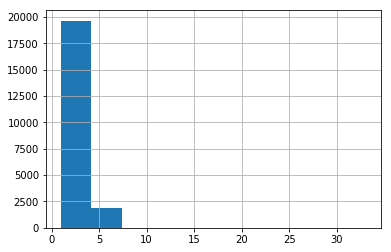

In [9]:
df['bedrooms'].hist()

In [10]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [11]:
df.loc[df['bedrooms']==33] #.loc[] to select the single row where bedrooms = 33

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [12]:
# Since there is only 1 entry with 33 bedrooms, and the other data for this house doesn't make
# sense for a house with 33 rooms (i.e. 1.75 bathrooms, 1,620 sqft, and $640,000), 33 may be a place holder
# I decided to drop the row
#df['bedrooms'] = df['bedrooms'].drop(df['bedrooms'].idxmax(axis=0))
df = df[df.bedrooms !=33] #dropping the row

In [13]:
# checking that that row was dropped
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

### Data Types

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
id               21596 non-null int64
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       19220 non-null float64
view             21533 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null object
yr_built         21596 non-null int64
yr_renovated     17754 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


#### sqft_basement is an object, we'll probably need to change this

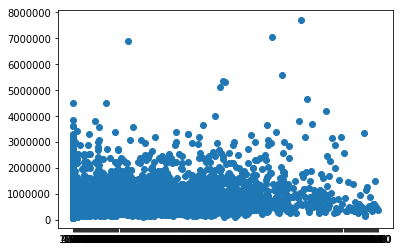

In [15]:
plt.scatter(df.sqft_basement, df.price) 
plt.show()

In [16]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
480.0       103
450.0       103
530.0       103
720.0        98
620.0        90
580.0        83
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
550.0        76
780.0        76
650.0        75
240.0        74
380.0        73
680.0        73
850.0        72
          ...  
225.0         1
65.0          1
1248.0        1
1798.0        1
475.0         1
862.0         1
1024.0        1
1816.0        1
2360.0        1
2196.0        1
1930.0        1
2240.0        1
266.0         1
2120.0        1
1275.0        1
1990.0        1
1525.0        1
2310.0        1
3480.0        1
2850.0        1
2300.0        1
417.0         1
2390.0        1
946.0         1
1852.0        1
666.0         1
2720.0        1
4130.0        1
2730.0        1
172.0         1
Name: sqft_basement, Len

In [17]:
print('Percentage of missing sqft_basement vales:', len(df[df.sqft_basement == '?'])/len(df))

Percentage of missing sqft_basement vales: 0.02102241155769587


It appears that sqft_basement is numeric data, but there are over 450 entries with "?" entries, making it impossible to simply convert from string to numeric. The rows containing '?' are only 2% of the data, so I decided to drop them.

In [18]:
df = df[df.sqft_basement !='?'] #dropping the rows

In [19]:
df.sqft_basement = df.sqft_basement.astype('float32') #converting to numerical

#### Possible categorical data stored as integers:
* zip codes and waterfront

#### Ordinal variables:
* bedrooms, bathrooms, floors, grade, view

I'll look into these more later...

### Detecting & Dealing with Null Values

* Examine how many, how prevalent. Is the missing data random or does it have a pattern?

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21142 entries, 0 to 21596
Data columns (total 21 columns):
id               21142 non-null int64
date             21142 non-null object
price            21142 non-null float64
bedrooms         21142 non-null int64
bathrooms        21142 non-null float64
sqft_living      21142 non-null int64
sqft_lot         21142 non-null int64
floors           21142 non-null float64
waterfront       18803 non-null float64
view             21081 non-null float64
condition        21142 non-null int64
grade            21142 non-null int64
sqft_above       21142 non-null int64
sqft_basement    21142 non-null float32
yr_built         21142 non-null int64
yr_renovated     17388 non-null float64
zipcode          21142 non-null int64
lat              21142 non-null float64
long             21142 non-null float64
sqft_living15    21142 non-null int64
sqft_lot15       21142 non-null int64
dtypes: float32(1), float64(8), int64(11), object(1)
memory usage: 3.5+ MB

* RangeIndex = 21,597 
* Note missing values in **waterfront**,  **view**, & **yr_renovated**

In [357]:
# inspecting null values
total = df.isnull().sum().sort_values(ascending=False)
total

yr_renovated     3754
waterfront       2339
view               61
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64

In [358]:
# calculate percentage of null values in yr_renovated
df.yr_renovated.isna().sum() / df.shape[0]

0.17756125248320878

In [359]:
# calculate percentage of null values in waterfront
df.waterfront.isna().sum() / df.shape[0]

0.110632863494466

* 18% of our data is null in **yr_renovated**
* 11% of our data is null in **waterfront**

In [21]:
#Since there is significant about of entries in yr-renovated that are missing,
#Let's assuming missing entries have not been renovated and turn yr_renovated into a 
#boolean to show if the house has ever been renovated

df['yr_renovated'].fillna(0, inplace=True)

df['yr_renovated'].isnull().sum()
df['yr_renovated'] = df['yr_renovated'].astype(bool)

How much data do we have on houses that have been renovated compared to those that have not?

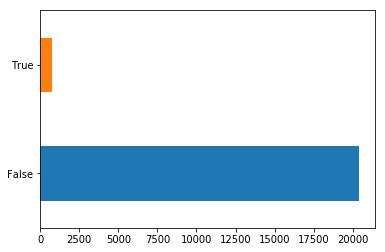

In [23]:
fig, ax = plt.subplots()
df['yr_renovated'].value_counts().plot(ax=ax, kind='barh');

We have very little data on houses that have been renovated, probably a good idea to drop.

Let's investigate waterfront:

In [362]:
df.waterfront.unique()

array([nan,  0.,  1.])

Approaches to handling null values:
* replace null values with mean
* drop the column
* drop the rows

Let's examine the distribution and if there seems to be a relationship with price. We can do this with a jointplot.

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


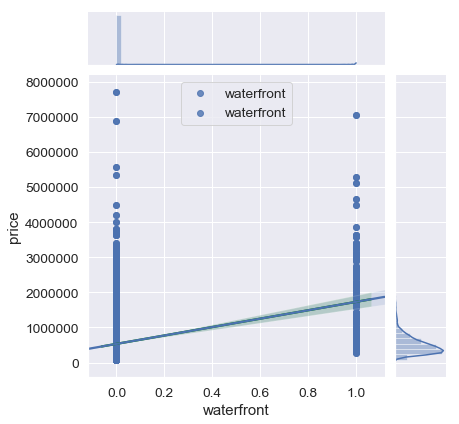

In [363]:
x = df['waterfront']
y = df['price']

for column in ['waterfront']:
    sns.jointplot(x=column, y="price",
                 data=df,
                 kind='reg',
                 label=column,
                 joint_kws={'line_kws':{'color':'green'}})
    sns.regplot(df[column], df.price, label=column)
    plt.legend()
    plt.show()

As we may expect, it does appear that houses on the waterfront are generally more expensive. However, in the histogram or waterfront displayed across the top of the plot I'm noticing that we have very little data on waterfront houses.

In [25]:
#Creating a dateframe that contains only entries that have data for waterfront
df_split_waterfront = df[df.waterfront == df.waterfront]
df_split_waterfront.shape

(18803, 21)

In [26]:
print(df_split_waterfront[df_split_waterfront.waterfront==0].shape, df_split_waterfront[df_split_waterfront.waterfront==1].shape)

(18661, 21) (142, 21)


Only 142 houses are on the waterfront...

In [27]:
print('Percentage of enteries with waterfront data:', len(df_split_waterfront)/len(df))
print('Percentage of houses on the waterfront:', len(df_split_waterfront[df_split_waterfront.waterfront==1])/len(df_split_waterfront))


Percentage of enteries with waterfront data: 0.889367136505534
Percentage of houses on the waterfront: 0.007551986385151306


As a sanity check let's use lat and long to build a scatter plot to see where these waterfront houses are:

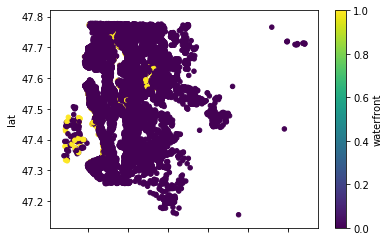

In [30]:
df.plot.scatter('long', 'lat', c='waterfront',  colormap = 'viridis');

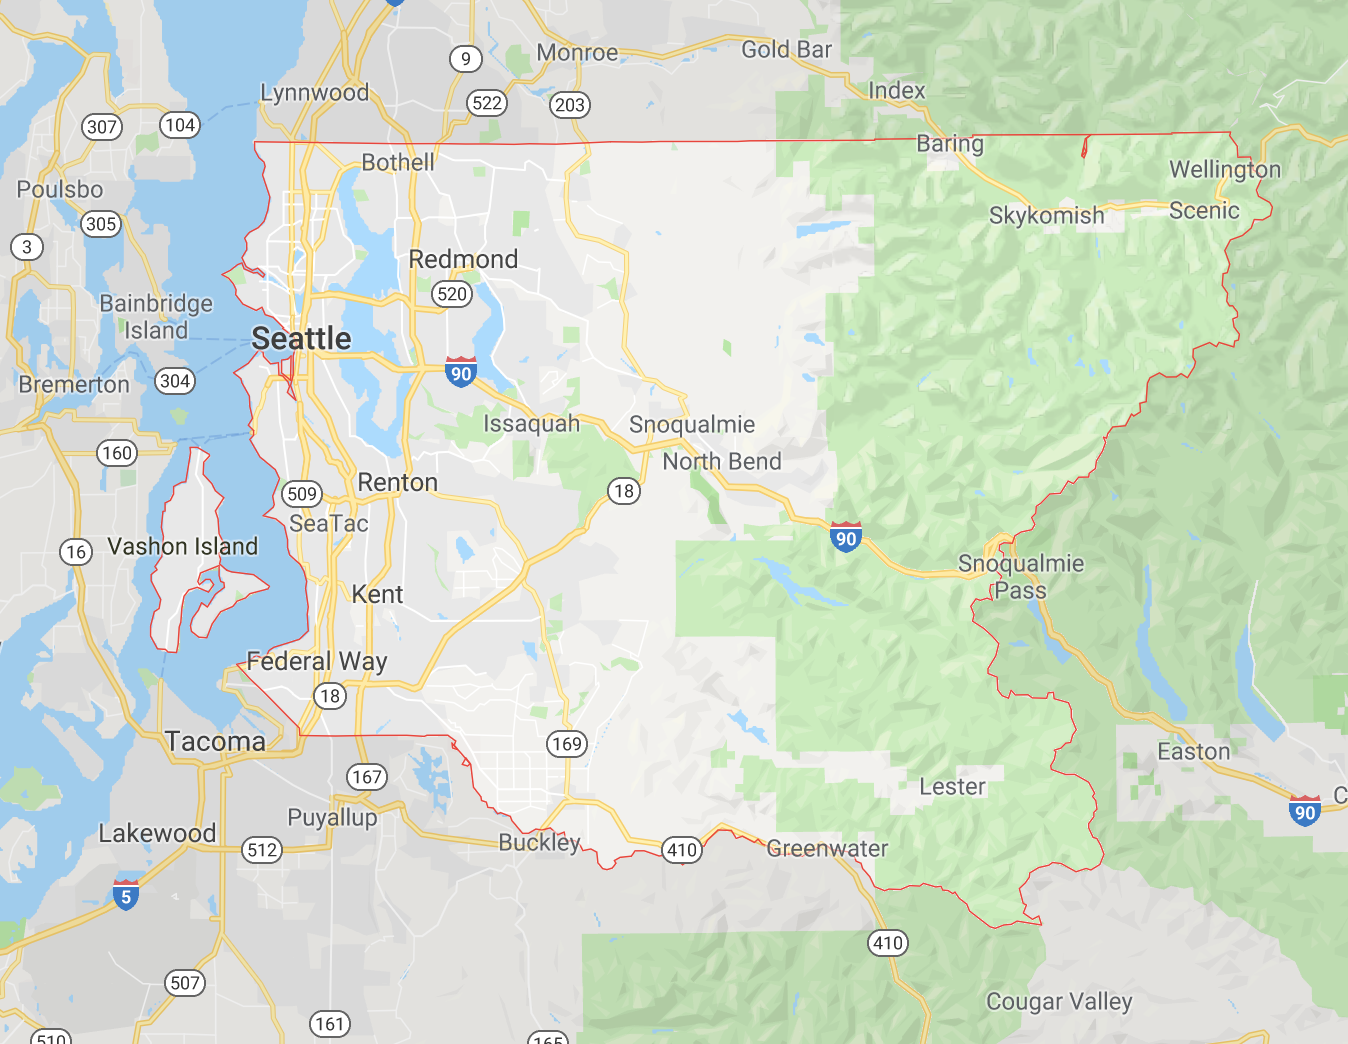

The above is a screen shot from google maps: https://www.google.com/maps/place/King+County,+WA/@47.4124808,-122.4017621,9z/data=!4m5!3m4!1s0x54905c8c832d7837:0xe280ab6b8b64e03e

Initially I thought that the waterfront data may be bad, since it looked like some waterfront properties were inland. But after comparing to the map it looks like some of them may be on lakes.

##### Waterfront Conclusion:
* Since 99.2% of the valid values in waterfront are false, I'll drop this column. It provides little insight into price since there are so few true values


#### Looking more at 'view'

In [31]:
df['view'].value_counts()

0.0    19017
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64

* It seems strange that 90% of houses aren't viewed before they are sold?
* I am deciding to drop 'view' for a few reasons: 1) many missing values, 2) I'm not confident in the validity of the data, and 3) logically, I don't know how the number of times a house has been viewed actually influences price? The only thing I can think of is perhaps as a proxy for lenght of time it's been on the market..

In [32]:
df = df.drop('waterfront', axis=1) #drop waterfront column
df = df.drop('view', axis=1) #drop view column
df = df.drop('yr_renovated', axis =1) #drop yr_renovated column
df = df.drop('id', axis = 1) #drop id, it won't tell us anything about price

## 3) Data Exploration

*Form hypotheses about your defined problem by visually analyzing the data and understanding basic statistics


### Univariable Study: Basic Statistics of our Target Variable

In [165]:
df['price'].describe()

count    2.114200e+04
mean     5.405060e+05
std      3.680831e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

The minimum is 78,000 and the maximum is 7,700,000. This seems plausible, no red flags off the bat.

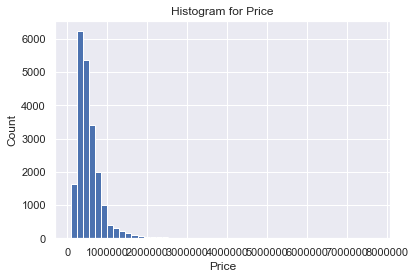

In [135]:
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram for Price')
df.price.hist(bins = 50)

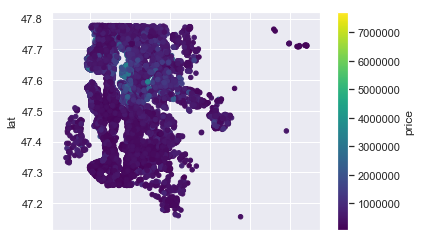

In [136]:
df.plot.scatter('long', 'lat', c='price',  colormap = 'viridis');

### Bivariate and multivariate study: Basic statistics of our predictors

How are the predictors distributed?

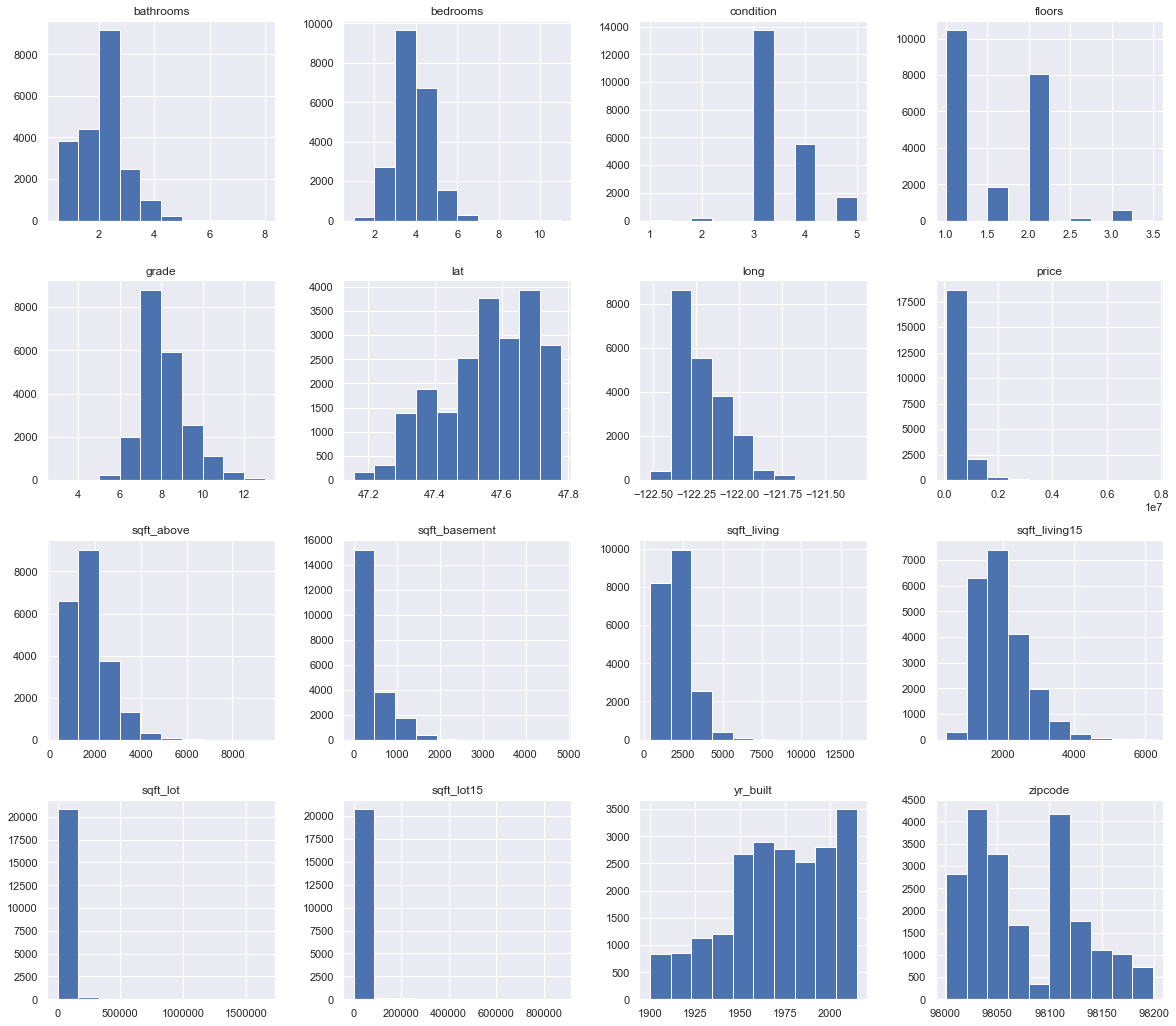

In [166]:
df.hist(figsize = (20,18));

In [ ]:
# bedrooms and grade are perhaps closest to a normal distribution, but essentially all variables
# break the normal assumption.
# There is a lot of skewness present, indicating possible outliers

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


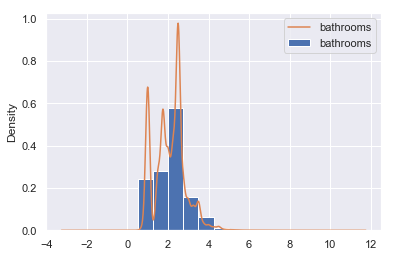

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


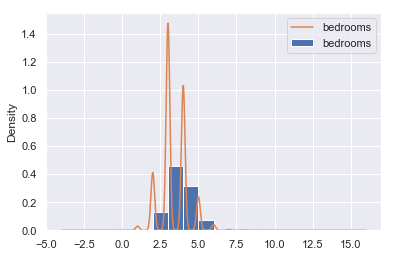

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


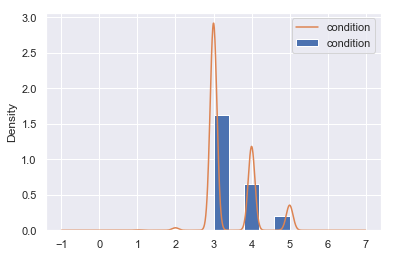

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


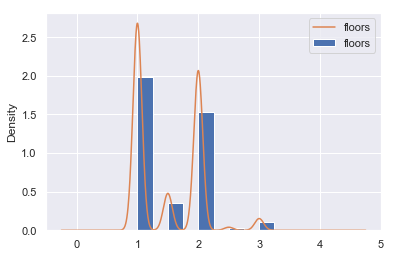

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


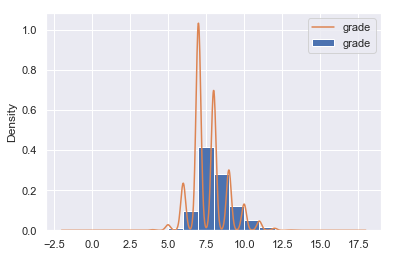

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


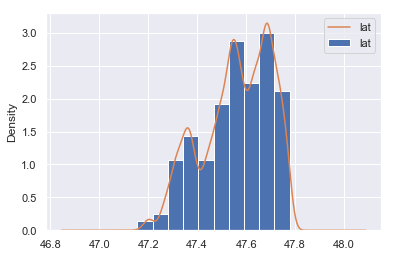

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


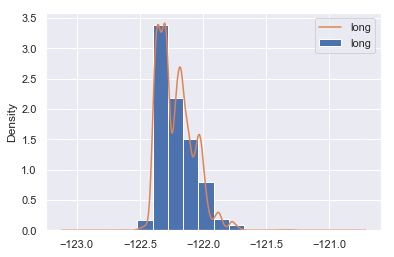

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


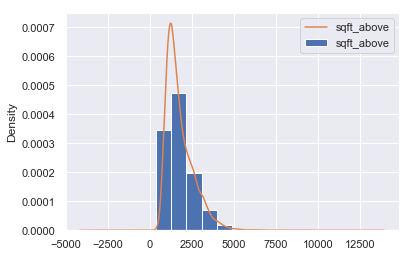

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


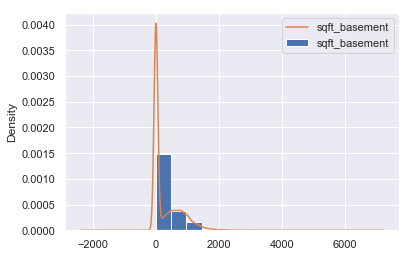

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


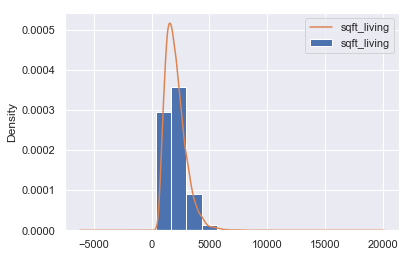

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


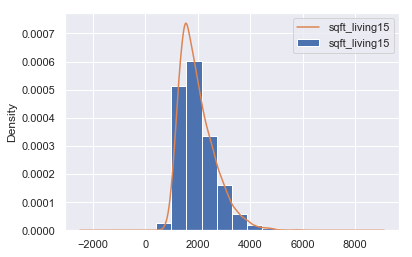

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


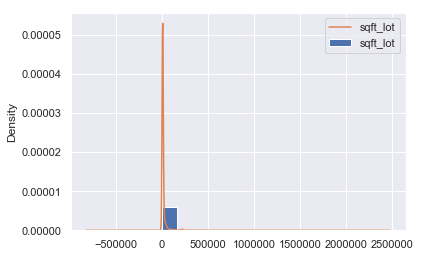

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


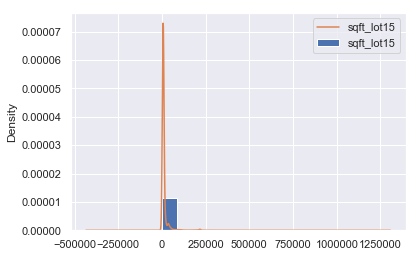

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


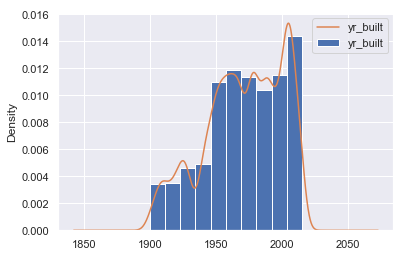

KeyError: 'yr_renovated'

In [167]:
for column in ['bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'lat', 'long', 
               'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 
               'yr_built', 'yr_renovated', 'zipcode']:
    df[column].plot.hist(normed=True)
    df[column].plot.kde(label=column)
    plt.legend()
    plt.show()

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


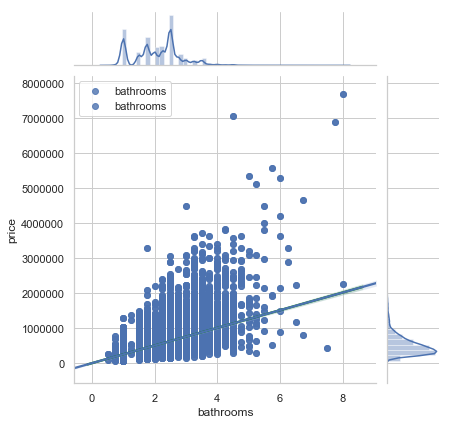

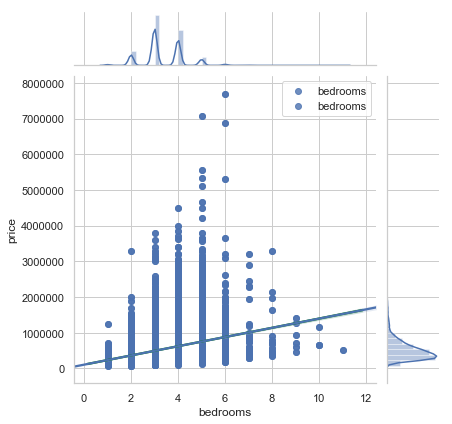

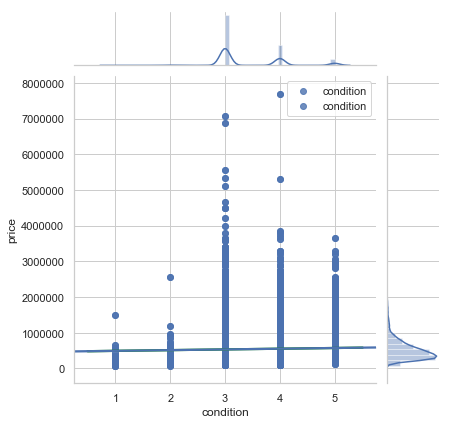

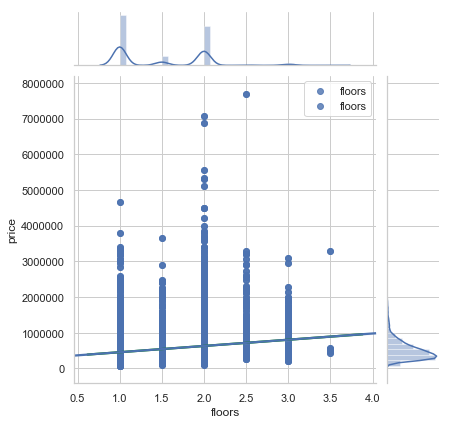

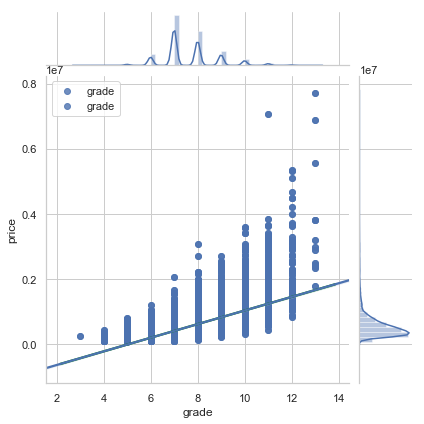

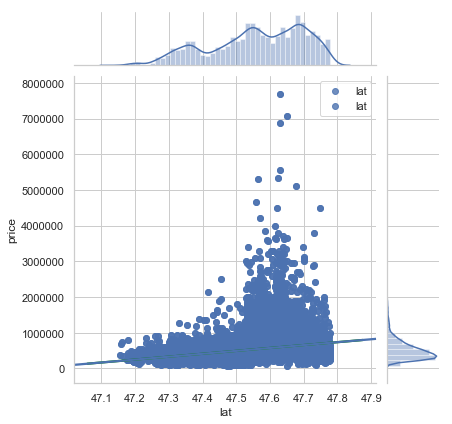

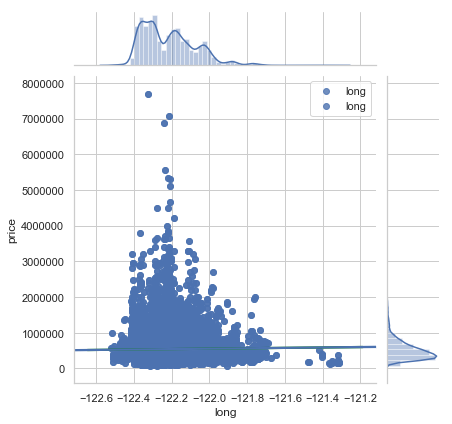

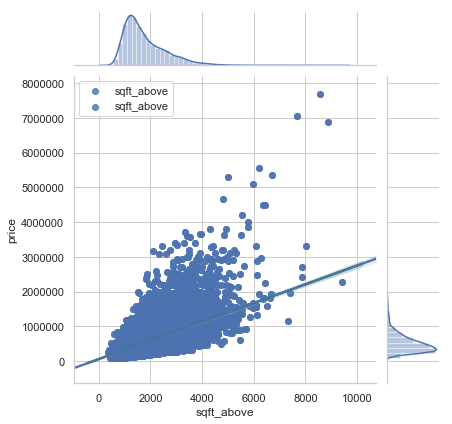

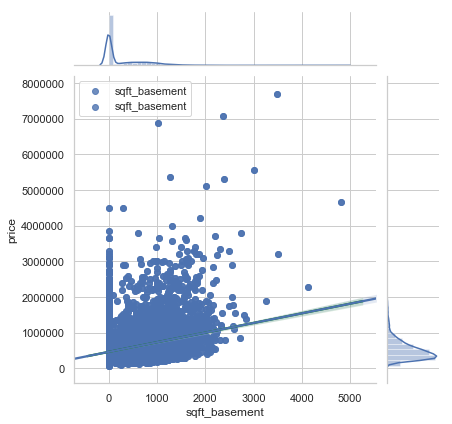

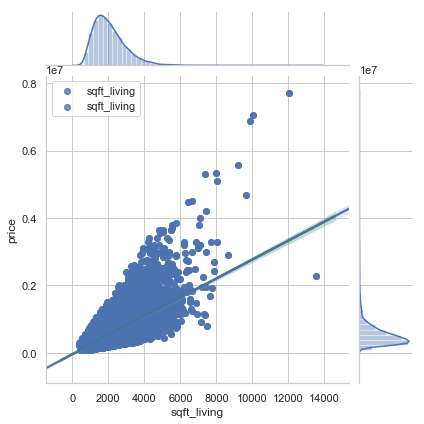

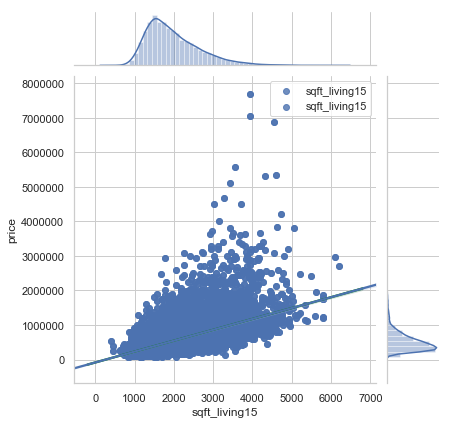

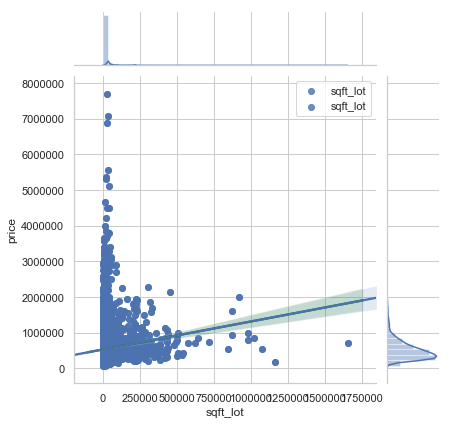

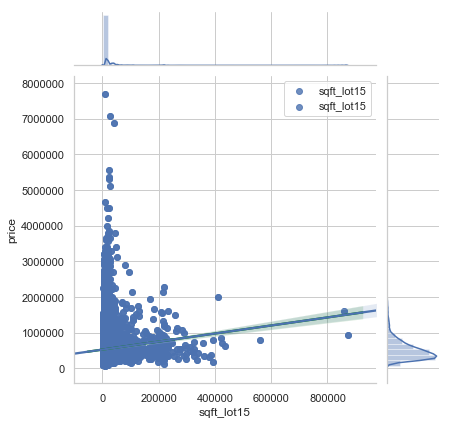

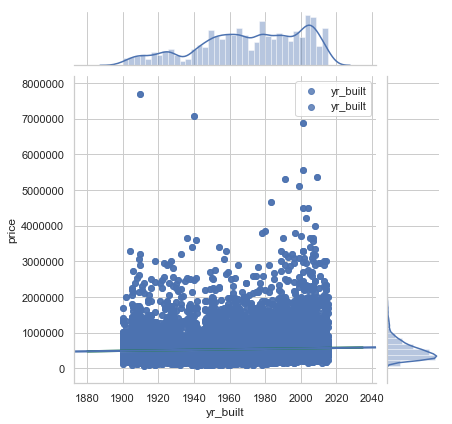

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

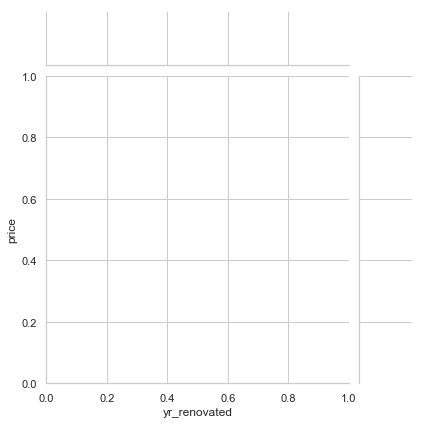

In [94]:
for column in ['bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'lat', 'long', 
               'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 
               'yr_built', 'yr_renovated', 'zipcode']:
    sns.jointplot(x=column, y="price",
                 data=df,
                 kind='reg',
                 label=column,
                 joint_kws={'line_kws':{'color':'green'}})
    sns.regplot(df[column], df.price, label=column)
    plt.legend()
    plt.show()

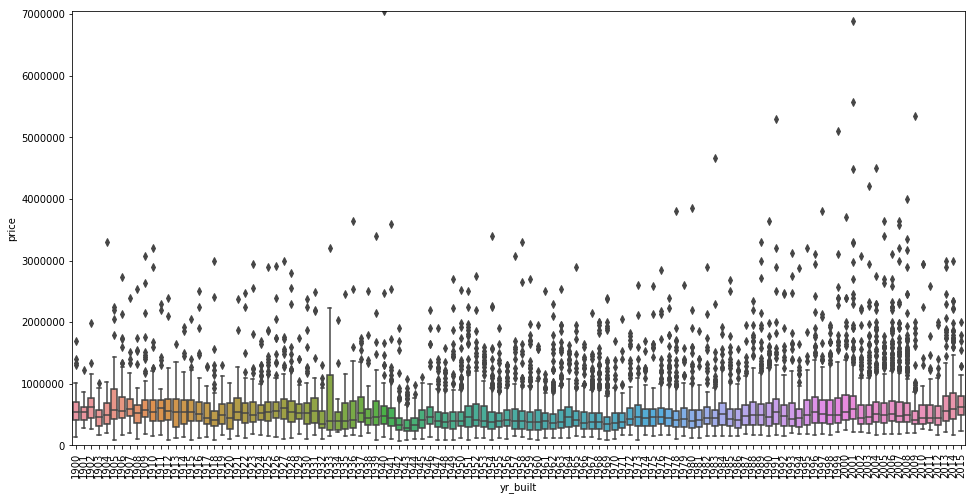

In [213]:
# benefit of box plot: show outliers and where majority of your data lies
var = 'yr_built'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="price", data=df)
fig.axis(ymin=0, ymax=7060000);
plt.xticks(rotation=90);

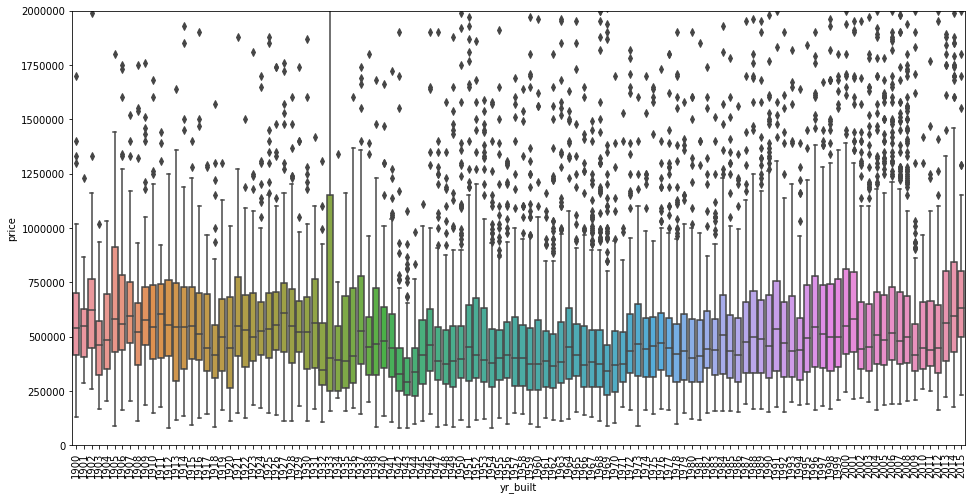

In [214]:
var = 'yr_built'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="price", data=df)
fig.axis(ymin=0, ymax=2000000);
plt.xticks(rotation=90);

The two box plots of year built are cool, but not that informative. I mostly wanted to explore Seaborn data visualization tools. If they offer any insight, it is that yr_built doesn't seem to have much of a relationship with price, just as we saw above in the joint plots.

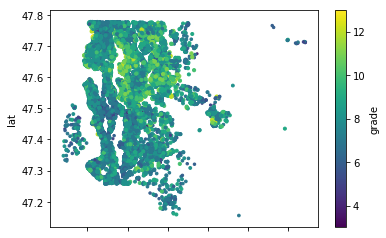

In [26]:
df.plot.scatter('long', 'lat', c='grade', s =df['grade'],  colormap = 'viridis');

More experimenting with data visualization that didn't end up being very useful... Perhaps houses in the North East are slightly more likely to have a higher grade.

### Visual Analysis of Predictors

##### Promising features:
Bathrooms:
* Possible positive relationship between number of bathrooms and price - this maskes sense
* However, there appears to be heteroscedasticity around the simple linear regression line
* The data is also skewed to the right 
* Even though it is sort of categorical, an increase in teh number of bathrooms looks to be associated with a higher price, so for now I'll leave it as continuous, but it is non-normal and multi modal

Bedrooms:
* Possible positive relationship with price - this maskes sense
* However, there appears to be heteroscedasticity around the simple linear regression line
* The data is also skewed to the right
* Even though it is sort of categorical, an increase in the number of bedrooms looks to be associated with a higher price, so for now I'll leave it as continuous, but it is non-normal and multi modal

sqft_living:
* Likely positive relationship with price - this maskes sense
* Lot's of heteroscedasticity around the simple linear regression line
* The data is skewed to the right

sqft_above:
* Likely positive relationship with price - this maskes sense
* Lot's of heteroscedasticity around the simple linear regression line
* The data is also skewed to the right

sqft_basement:
* lot's of zeros - don't think a log transforamtion will work in this case -> square root?
* Likely positive relationship with price - this maskes sense
* Lot's of heteroscedasticity around the simple linear regression line
* The data is also skewed to the right

sqft_living15:
* Likely positive relationship with price - this maskes sense
* Lot's of heteroscedasticity around the simple linear regression line
* The data is skewed to the right

Grade and floors: 
* Appear to have positive relationships with price, but not normally distributed due to it's "categorical" like structure, appears multi-modal

Sqft_lot and sqft_lot15: 
* Have many 0 values, this makes sense since some homes may be condos, I'm not sure how to handle these in the model...

lat and long:
* Not sure how to use these in a model...

##### Features to be dropped:
yr_built and yr_renovated are all very non-normal and don't show much of a relationship with price

Conclusions:
*Our key assumptions for regression at this stage don't hold so strong. There are pre-processing techniques we can apply to further clean the data to make it more suitable for modeling


### Checking for Multicollinearity

* check that the data does not have high multicollinearity, or correlation/covariance between our predictor columns

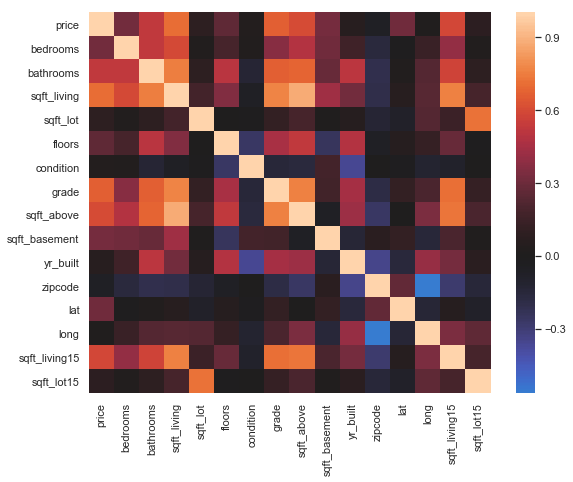

In [169]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(df.corr(), center = 0);

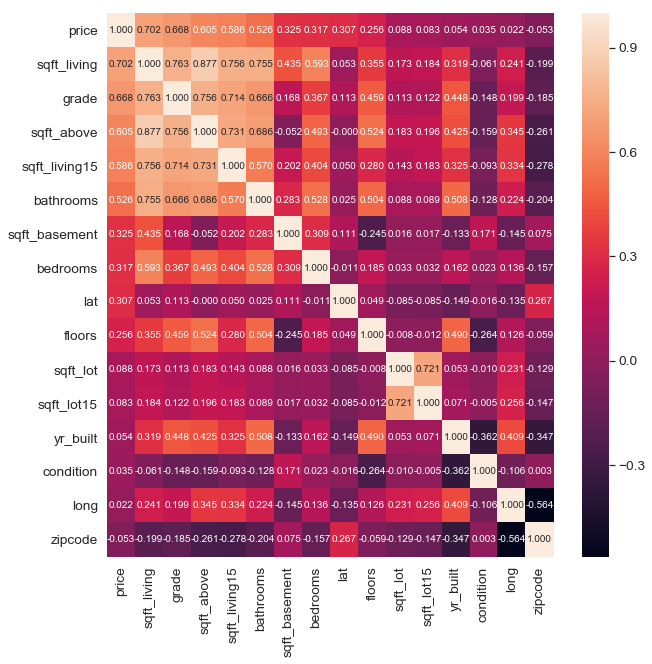

In [172]:
#Annotated heatmap to associate values to the variables
#https://seaborn.pydata.org/examples/heatmap_annotation.html
k = 16 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(10, 10))
hm = sns.heatmap(cm,annot=True, fmt='.3f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

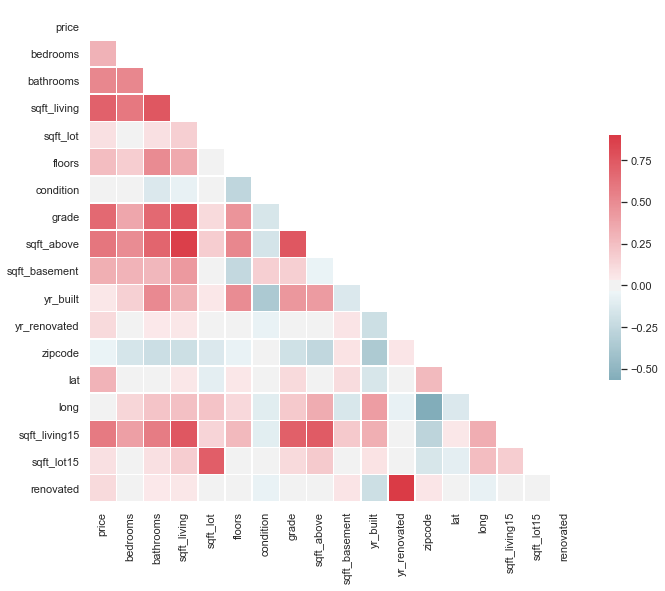

In [97]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [207]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.316573,0.525899,0.702340,0.087940,0.256372,0.397182,0.035264,0.667751,0.605167,0.325003,0.054471,0.128231,0.306502,0.022112,0.586441,0.083196
bedrooms,0.316573,1.000000,0.527526,0.593340,0.033418,0.184979,0.082885,0.022564,0.366745,0.492695,0.309298,0.162247,0.020032,-0.011191,0.135692,0.403859,0.031707
bathrooms,0.525899,0.527526,1.000000,0.755275,0.087880,0.504063,0.187244,-0.127979,0.666489,0.686453,0.282712,0.508401,0.051730,0.025015,0.224466,0.570123,0.088828
sqft_living,0.702340,0.593340,0.755275,1.000000,0.172937,0.354675,0.283792,-0.061245,0.763098,0.876679,0.434598,0.319448,0.054285,0.053009,0.240782,0.756387,0.184460
sqft_lot,0.087940,0.033418,0.087880,0.172937,1.000000,-0.007531,0.072665,-0.009646,0.113397,0.183456,0.015540,0.052760,0.003488,-0.085449,0.230578,0.143421,0.720648
floors,0.256372,0.184979,0.504063,0.354675,-0.007531,1.000000,0.027735,-0.264217,0.459202,0.524207,-0.245123,0.489647,0.003245,0.049018,0.125890,0.280264,-0.011558
view,0.397182,0.082885,0.187244,0.283792,0.072665,0.027735,1.000000,0.045506,0.250008,0.166898,0.276534,-0.054428,0.098944,0.006187,-0.076320,0.280927,0.072793
condition,0.035264,0.022564,-0.127979,-0.061245,-0.009646,-0.264217,0.045506,1.000000,-0.148466,-0.159210,0.170923,-0.362069,-0.062242,-0.015701,-0.106205,-0.093398,-0.004826
grade,0.667751,0.366745,0.666489,0.763098,0.113397,0.459202,0.250008,-0.148466,1.000000,0.756379,0.168043,0.448108,0.016900,0.113407,0.199170,0.713569,0.121915
sqft_above,0.605167,0.492695,0.686453,0.876679,0.183456,0.524207,0.166898,-0.159210,0.756379,1.000000,-0.052266,0.425160,0.020782,-0.000307,0.344519,0.731005,0.195630


In [208]:
abs(df.corr())>0.8

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False


*sqft_living is highly correlated with sqft_above, which makes sense. 

*There is duplicate info by keeping sqft_living and sqft_above and sqft_basement

*the distribution for sqft_basement is very strange, and I think it's most important to understand the total square footage and whether or not the house has a basement, so I may drop sqft_above and create a boolean for has basement

## Feature Engineering

* Select important features and construct more meaningful ones using the raw data that you have
* transformation then scaling

* log transformation: reduces skewness, reduce variability of data,
* min-max scaling: brings values between 0 and 1
* standardization: does NOT make the data more normal, but it will change the mean and standard error
* mean normalization: values between -1 and 1 and a mean of 0
* skewness and kurtosis, if skewed you can start normalizing it (log transformation --> but not with tons of zeros)

#### Categorical Data Stored as Numeric

In [370]:
df.zipcode = df.zipcode.astype('str')

#### A for-loop to look at some results for each linear regression model
* run a simple OLS regression between (continuous) independent and dependent variables

In [371]:
import statsmodels.formula.api as smf

In [372]:
col_names = df.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

price~bedrooms
------------------------------
['bedrooms', 0.10021824588099015, 105105.30020456141, 129154.68765275997, 0.0]
price~bathrooms
------------------------------
['bathrooms', 0.2765694115784113, 7522.067917900262, 251871.3580043978, 0.0]
price~sqft_living
------------------------------
['sqft_living', 0.4932807937659991, -45151.56483712692, 281.43861622692765, 0.0]
price~sqft_lot
------------------------------
['sqft_lot', 0.007733385323482778, 528655.266755299, 0.7854649067481476, 1.4274879993770415e-37]
price~floors
------------------------------
['floors', 0.06572649153275978, 279131.46125707874, 174994.64678266004, 0.0]
price~condition
------------------------------
['condition', 0.0012435338573831833, 472458.14271365805, 19956.28104406716, 2.9167752799905927e-07]
price~grade
------------------------------
['grade', 0.4458916252519133, -1062461.9666940714, 209310.91710216698, 0.0]
price~sqft_above
------------------------------
['sqft_above', 0.3662270242827216, 59434.42

* All the models appear to be statistically significant, as indicated by the pvalue < 0.05
* The features with the highest R^2 values are:
    - sqft_living, R^2 = 0.493
    - grade, R^2 = 0.446
    - sqft_above, R^2 = 0.366
    - sqft_living15, R^2 = 0.344
    - bathrooms, R^2 = 0.277
    - sqft_basement, R^2 = 0.106
    - bedrooms, R^2 = 0.100
    - floors = 0.066

In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21142 entries, 0 to 21596
Data columns (total 17 columns):
date             21142 non-null object
price            21142 non-null float64
bedrooms         21142 non-null int64
bathrooms        21142 non-null float64
sqft_living      21142 non-null int64
sqft_lot         21142 non-null int64
floors           21142 non-null float64
condition        21142 non-null int64
grade            21142 non-null int64
sqft_above       21142 non-null int64
sqft_basement    21142 non-null float32
yr_built         21142 non-null int64
zipcode          21142 non-null object
lat              21142 non-null float64
long             21142 non-null float64
sqft_living15    21142 non-null int64
sqft_lot15       21142 non-null int64
dtypes: float32(1), float64(5), int64(9), object(2)
memory usage: 2.8+ MB


In [374]:
#choosing my features. I'll drop sqft_above, since it is highly correlated with sqft_living
#info will be duplicated by keeping both sqft_above and sqft_living. Also, dropping yr_built, lat
#and long
features = df.iloc[:, 1:19]
to_drop = ["sqft_above", "yr_built","lat","long"]
features = features.drop(to_drop, axis=1)
features.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_basement,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,0.0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,400.0,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,0.0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,910.0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,0.0,98074,1800,7503


### Transforming the data

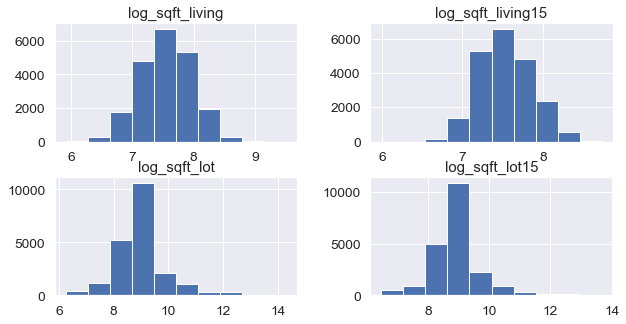

In [375]:
features_transformed = pd.DataFrame([])
features_transformed['log_sqft_living'] = np.log(features['sqft_living'])
features_transformed['log_sqft_living15'] = np.log(features['sqft_living15'])
features_transformed['log_sqft_lot']=np.log(features['sqft_lot'])
features_transformed['log_sqft_lot15']=np.log(features['sqft_lot15'])
features_transformed.hist(figsize = [10,5]);

In [376]:
features_transformed.head()

,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15
0,7.073270,7.200425,8.639411,8.639411
1,7.851661,7.432484,8.887653,8.941022
2,6.646391,7.908387,9.210340,8.994917
3,7.580700,7.215240,8.517193,8.517193
4,7.426549,7.495542,8.997147,8.923058


In [377]:
#converting basement to a boolean and adding to the transformed features
features_transformed['basement_bool'] = df.sqft_basement.astype('bool')

In [378]:
features_transformed.head()

,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15,basement_bool
0,7.073270,7.200425,8.639411,8.639411,False
1,7.851661,7.432484,8.887653,8.941022,True
2,6.646391,7.908387,9.210340,8.994917,False
3,7.580700,7.215240,8.517193,8.517193,True
4,7.426549,7.495542,8.997147,8.923058,False


In [379]:
#adding the transformed features into my features dataframe
features = pd.concat([features, features_transformed], axis=1)

In [380]:
features.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_basement,zipcode,sqft_living15,sqft_lot15,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15,basement_bool
0,221900.0,3,1.00,1180,5650,1.0,3,7,0.0,98178,1340,5650,7.073270,7.200425,8.639411,8.639411,False
1,538000.0,3,2.25,2570,7242,2.0,3,7,400.0,98125,1690,7639,7.851661,7.432484,8.887653,8.941022,True
2,180000.0,2,1.00,770,10000,1.0,3,6,0.0,98028,2720,8062,6.646391,7.908387,9.210340,8.994917,False
3,604000.0,4,3.00,1960,5000,1.0,5,7,910.0,98136,1360,5000,7.580700,7.215240,8.517193,8.517193,True
4,510000.0,3,2.00,1680,8080,1.0,3,8,0.0,98074,1800,7503,7.426549,7.495542,8.997147,8.923058,False


## Predictive Modeling

* Train machine learning models, evaluate the performance, and use them to make predictions

#### Creating a dataframe for an initial model

In [184]:
df_model_1 = pd.DataFrame([])
df_model_1 = pd.concat([features], axis=1)
df_model_1 = df_model_1.drop("sqft_living", axis =1)
df_model_1 = df_model_1.drop("sqft_lot", axis =1)
df_model_1 = df_model_1.drop("sqft_lot15", axis =1)
df_model_1 = df_model_1.drop("sqft_living15", axis =1)
df_model_1 = df_model_1.drop("sqft_basement", axis = 1)
df_model_1.head()

,price,bedrooms,bathrooms,floors,condition,grade,zipcode,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15,basement_bool
0,221900.0,3,1.00,1.0,3,7,98178,7.073270,7.200425,8.639411,8.639411,False
1,538000.0,3,2.25,2.0,3,7,98125,7.851661,7.432484,8.887653,8.941022,True
2,180000.0,2,1.00,1.0,3,6,98028,6.646391,7.908387,9.210340,8.994917,False
3,604000.0,4,3.00,1.0,5,7,98136,7.580700,7.215240,8.517193,8.517193,True
4,510000.0,3,2.00,1.0,3,8,98074,7.426549,7.495542,8.997147,8.923058,False


In [185]:
df_model_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21142 entries, 0 to 21596
Data columns (total 12 columns):
price                21142 non-null float64
bedrooms             21142 non-null int64
bathrooms            21142 non-null float64
floors               21142 non-null float64
condition            21142 non-null int64
grade                21142 non-null int64
zipcode              21142 non-null object
log_sqft_living      21142 non-null float64
log_sqft_living15    21142 non-null float64
log_sqft_lot         21142 non-null float64
log_sqft_lot15       21142 non-null float64
basement_bool        21142 non-null bool
dtypes: bool(1), float64(7), int64(3), object(1)
memory usage: 2.0+ MB


### One-Hot Encoding Categorial Data

In [186]:
df_model_1 = pd.get_dummies(df_model_1)

### Initial Model

In [187]:
#Define the problem
outcome = 'price'
predictors = df_model_1.drop('price', axis=1)

In [188]:
from statsmodels.formula.api import ols

In [189]:
#fitting model
predictors = '+'.join(predictors)
formula = outcome + "~" + predictors
model_1 = ols(formula=formula, data=df_model_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     667.6
Date:                Wed, 19 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:59:52   Log-Likelihood:            -2.8770e+05
No. Observations:               21142   AIC:                         5.756e+05
Df Residuals:                   21062   BIC:                         5.762e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -2.777e+06   4.93e+04    -56.368      0.000   -2.87e+06   -2.68e+06
basement_bool[T.True] -3.011e+04   3612.110     -8.334      0.000   -3.72e+04    -2.3e+04
bedrooms              -2.133e+04   2059.001    -10.357      0.000   -2.54e+04   -1.73e+04
bathrooms              6.592e+04   3090.913     21.326      0.000    5.99e+04     7.2e+04
floors                 -3.26e+04   3837.985     -8.495      0.000   -4.01e+04   -2.51e+04
condition              3.411e+04   2259.094     15.101      0.000    2.97e+04    3.85e+04
grade                  9.843e+04   2077.480     47.378      0.000    9.44e+04    1.02e+05
log_sqft_living        1.947e+05   7803.485     24.955      0.000    1.79e+05     2.1e+05
log_sqft_living15      7.031e+04   7229.171      9.726      0.000    5.61e+04    8.45e+04
log_sqft_lot           6.137e+04   3942.227     15.567      0.000    5.36e+04    6.91e+04
log_sqft_lot15        -6511.5462   4406.805     -1.478      0.140   -1.51e+04    2126.129
zipcode_98001         -2.756e+05   1.05e+04    -26.210      0.000   -2.96e+05   -2.55e+05
zipcode_98002         -2.021e+05    1.4e+04    -14.430      0.000    -2.3e+05   -1.75e+05
zipcode_98003         -2.869e+05   1.19e+04    -24.143      0.000    -3.1e+05   -2.64e+05
zipcode_98004          5.371e+05   1.13e+04     47.510      0.000    5.15e+05    5.59e+05
zipcode_98005          3721.0008   1.53e+04      0.243      0.808   -2.63e+04    3.37e+04
zipcode_98006          1.765e+04   9267.474      1.905      0.057    -511.288    3.58e+04
zipcode_98007         -4.323e+04   1.66e+04     -2.602      0.009   -7.58e+04   -1.07e+04
zipcode_98008          2.697e+04   1.18e+04      2.280      0.023    3788.008    5.02e+04
zipcode_98010         -2.174e+05   1.99e+04    -10.922      0.000   -2.56e+05   -1.78e+05
zipcode_98011         -1.586e+05   1.42e+04    -11.182      0.000   -1.86e+05   -1.31e+05
zipcode_98014         -1.893e+05   1.81e+04    -10.468      0.000   -2.25e+05   -1.54e+05
zipcode_98019         -2.059e+05   1.44e+04    -14.261      0.000   -2.34e+05   -1.78e+05
zipcode_98022         -2.744e+05   1.32e+04    -20.781      0.000      -3e+05   -2.49e+05
zipcode_98023         -3.046e+05   8965.879    -33.973      0.000   -3.22e+05   -2.87e+05
zipcode_98024         -1.357e+05   2.23e+04     -6.089      0.000   -1.79e+05    -9.2e+04
zipcode_98027         -1.121e+05   9990.053    -11.225      0.000   -1.32e+05   -9.26e+04
zipcode_98028         -1.506e+05   1.19e+04    -12.704      0.000   -1.74e+05   -1.27e+05
zipcode_98029         -7.642e+04   1.13e+04     -6.744      0.000   -9.86e+04   -5.42e+04
zipcode_98030         -2.759e+05   1.24e+04    -22.187      0.000      -3e+05   -2.51e+05
zipcode_98031         -2.719e+05   1.21e+04    -22.510      0.000   -2.96e+05   -2.48e+05
zipcode_98032          

#### Checking for Normality
* Ensure that our residuals are normally distributed with a Q-Q plot

In [190]:
import statsmodels.api as sm
import scipy.stats as stats

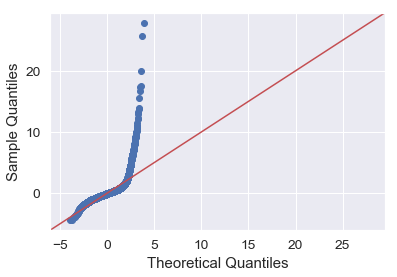

In [191]:
fig = sm.graphics.qqplot(model_1.resid, dist=stats.norm, line='45', fit=True)

### Recursive Feature Selection

In [194]:
y = df_model_1[["price"]]
X = df_model_1.drop(["price"], axis=1)
X.head()

,bedrooms,bathrooms,floors,condition,grade,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15,basement_bool,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,1.0,3,7,7.073270,7.200425,8.639411,8.639411,False,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2.0,3,7,7.851661,7.432484,8.887653,8.941022,True,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,1.0,3,6,6.646391,7.908387,9.210340,8.994917,False,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1.0,5,7,7.580700,7.215240,8.517193,8.517193,True,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1.0,3,8,7.426549,7.495542,8.997147,8.923058,False,...,0,0,0,0,0,0,0,0,0,0


In [195]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [196]:
r_list = []
adj_r_list = []
list_n = list(range(5,100,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

price    0.040337
dtype: float64
price    0.036691
dtype: float64
price    0.107075
dtype: float64
price    0.103684
dtype: float64
price    0.189332
dtype: float64
price    0.186252
dtype: float64
price    0.241604
dtype: float64
price    0.238724
dtype: float64
price    0.282048
dtype: float64
price    0.279321
dtype: float64
price    0.3306
dtype: float64
price    0.328057
dtype: float64
price    0.385897
dtype: float64
price    0.383565
dtype: float64
price    0.708665
dtype: float64
price    0.707559
dtype: float64
price    0.714631
dtype: float64
price    0.713547
dtype: float64
price    0.714631
dtype: float64
price    0.713547
dtype: float64


The R^2 increases as we add more features and the difference between R^2 and adj R^2 is negligible. Let's run a test train split to see if we are overfitting.

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

MSE_test = []
MSE_train = []
list_n = list(range(5,86,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-yhat_test)**2)/len(y_test)
    print(mse_train)
    print(mse_test)
MSE_test.append(mse_test)
MSE_train.append(mse_train)

price    1.115440e+11
dtype: float64
price    9.568995e+10
dtype: float64
price    9.683732e+10
dtype: float64
price    8.480727e+10
dtype: float64
price    9.005218e+10
dtype: float64
price    7.791445e+10
dtype: float64
price    8.515433e+10
dtype: float64
price    7.379072e+10
dtype: float64
price    8.362405e+10
dtype: float64
price    7.215844e+10
dtype: float64
price    8.279786e+10
dtype: float64
price    7.141644e+10
dtype: float64
price    8.271731e+10
dtype: float64
price    7.139288e+10
dtype: float64
price    4.100236e+10
dtype: float64
price    3.359545e+10
dtype: float64
price    4.014063e+10
dtype: float64
price    3.301611e+10
dtype: float64


the MSE continues to improve as we add variables, so a bigger model improves performance. But we are seeing a difference between the train and test MSE

Not terrible for an initial model. Adj R^2 is 0.714, meaning that the model explains about 71% of the variation in price

I'm noticing a few things:
* log_sqft_lot15 pvalue is 0.14, which is greater than 0.05. I think I'll drop this in the next round
* The coefficients on some zip codes are significant, while on others they are not
* The Q-Q plot is showing that the residuals are normally distributed for some of the data, however, looks like there may be issues with outliers
* I probably should have performed min-max scaling so it's easier to compare the impact of each feature

### Model Refinement
* Tweak & Rerun

### Let's try logging the outcome variable

In [206]:
price_log = pd.DataFrame([])
price_log['price_log'] = np.log(df['price'])

df_model_price_log = pd.DataFrame([])
df_model_price_log = pd.concat([price_log, features], axis=1)
df_model_price_log = df_model_price_log.drop("sqft_living", axis =1)
df_model_price_log = df_model_price_log.drop("sqft_living15", axis =1)
df_model_price_log = df_model_price_log.drop("sqft_lot", axis =1)
df_model_price_log = df_model_price_log.drop("sqft_lot15", axis =1)
df_model_price_log = df_model_price_log.drop("sqft_basement", axis = 1)
df_model_price_log = df_model_price_log.drop("price", axis = 1)
df_model_price_log = pd.get_dummies(df_model_price_log)
df_model_price_log.head()

,price_log,bedrooms,bathrooms,floors,condition,grade,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,12.309982,3,1.00,1.0,3,7,7.073270,7.200425,8.639411,8.639411,...,0,0,0,0,0,0,1,0,0,0
1,13.195614,3,2.25,2.0,3,7,7.851661,7.432484,8.887653,8.941022,...,0,0,0,0,0,0,0,0,0,0
2,12.100712,2,1.00,1.0,3,6,6.646391,7.908387,9.210340,8.994917,...,0,0,0,0,0,0,0,0,0,0
3,13.311329,4,3.00,1.0,5,7,7.580700,7.215240,8.517193,8.517193,...,0,0,0,0,0,0,0,0,0,0
4,13.142166,3,2.00,1.0,3,8,7.426549,7.495542,8.997147,8.923058,...,0,0,0,0,0,0,0,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c238114e0>]],
      dtype=object)

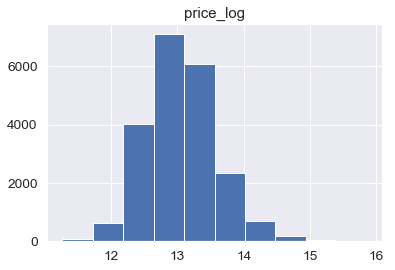

In [207]:
price_log.hist()

### Log of Price Model

In [208]:
#Define the problem
outcome = 'price_log'
predictors = df_model_price_log.drop('price_log', axis=1)

In [209]:
#fitting model
predictors = '+'.join(predictors)
formula = outcome + "~" + predictors
model_price_log = ols(formula=formula, data=df_model_price_log).fit()
model_price_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1711.
Date:                Wed, 19 Jun 2019   Prob (F-statistic):               0.00
Time:                        18:40:11   Log-Likelihood:                 4739.1
No. Observations:               21142   AIC:                            -9318.
Df Residuals:                   21062   BIC:                            -8681.
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 6.8133      0.048    140.603      0.000       6.718       6.908
basement_bool[T.True]    -0.0316      0.004     -8.887      0.000      -0.039      -0.025
bedrooms                 -0.0236      0.002    -11.667      0.000      -0.028      -0.020
bathrooms                 0.0433      0.003     14.237      0.000       0.037       0.049
floors                   -0.0095      0.004     -2.530      0.011      -0.017      -0.002
condition                 0.0548      0.002     24.655      0.000       0.050       0.059
grade                     0.1036      0.002     50.692      0.000       0.100       0.108
log_sqft_living           0.4118      0.008     53.654      0.000       0.397       0.427
log_sqft_living15         0.1968      0.007     27.674      0.000       0.183       0.211
log_sqft_lot              0.0801      0.004     20.671      0.000       0.073       0.088
log_sqft_lot15           -0.0157      0.004     -3.625      0.000      -0.024      -0.007
zipcode_98001            -0.4010      0.010    -38.775      0.000      -0.421      -0.381
zipcode_98002            -0.3785      0.014    -27.474      0.000      -0.405      -0.351
zipcode_98003            -0.3793      0.012    -32.455      0.000      -0.402      -0.356
zipcode_98004             0.7221      0.011     64.942      0.000       0.700       0.744
zipcode_98005             0.2973      0.015     19.754      0.000       0.268       0.327
zipcode_98006             0.2443      0.009     26.801      0.000       0.226       0.262
zipcode_98007             0.2357      0.016     14.427      0.000       0.204       0.268
zipcode_98008             0.2880      0.012     24.756      0.000       0.265       0.311
zipcode_98010            -0.1675      0.020     -8.555      0.000      -0.206      -0.129
zipcode_98011             0.0283      0.014      2.032      0.042       0.001       0.056
zipcode_98014            -0.1031      0.018     -5.797      0.000      -0.138      -0.068
zipcode_98019            -0.0990      0.014     -6.970      0.000      -0.127      -0.071
zipcode_98022            -0.3265      0.013    -25.137      0.000      -0.352      -0.301
zipcode_98023            -0.4310      0.009    -48.874      0.000      -0.448      -0.414
zipcode_98024             0.0139      0.022      0.635      0.525      -0.029       0.057
zipcode_98027             0.0974      0.010      9.914      0.000       0.078       0.117
zipcode_98028             0.0093      0.012      0.799      0.424      -0.014       0.032
zipcode_98029             0.1941      0.011     17.420      0.000       0.172       0.216
zipcode_98030            -0.3575      0.012    -29.235      0.000      -0.381      -0.334
zipcode_98031            -0.3379      0.012    -28.449      0.000      -0.361      -0.315
zipcode_98032          

#### Checking for Normality
* Ensure that our residuals are normally distributed with a Q-Q plot

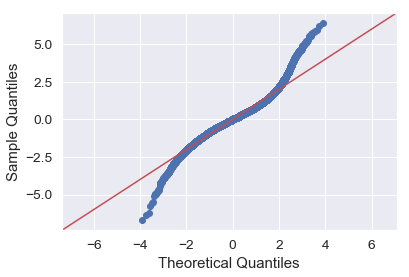

In [210]:
fig = sm.graphics.qqplot(model_price_log.resid, dist=stats.norm, line='45', fit=True)

In [211]:
X = df_model_price_log.drop('price_log', axis=1)
y = pd.DataFrame(df_model_price_log, columns= ["price_log"])

### Train-Test-Split (should do before modeling)

In [212]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [214]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16913 4229 16913 4229


In [215]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [216]:
#look at the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [217]:
#compare MSE of train and test set
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.037098635874759936
Test Mean Squarred Error: 0.03878374794297892


Conclusions for Log of Price Model:
    * Adj R^2 increased to 0.865
    * MSE for train and test are now very similar - this is good, means it's unlikely we are overfitting
    * All coefficiencts are significant, except some zipcodes, still some zipcodes impact price, others do not
    * Interestingly log_sqft_lot15 is now significant in this model
    * However, the intercept coefficient is very large and some coefficient are counter-intuitively negative  ---> I probably should try min-max scaling

#### Min-max scaling
When performing min-max scaling, you can transform x to get the transformed  x′x′  by using the formula:

x′=(x−min(x))/(max(x)−min(x))
 
This way of scaling brings values between 0 and 1

#### Standardization
When

x′=(x−xbar)/σ
 
x' will have mean  μ=0  and  σ=1
Note that standardization does not make data more normal, it will just change the mean and the standard error!

#### Mean normalization
When performing mean normalization, you use the following formula:
x′=(x−mean(x))/(max(x)−min(x))
 
The distribution will have values between -1 and 1, and a mean of 0.

In [287]:
features.head()

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_basement,zipcode,sqft_living15,log_sqft_living,log_sqft_living15,basement_bool
0,221900.0,3,1.00,1180,1.0,7,0.0,98178,1340,7.073270,7.200425,False
1,538000.0,3,2.25,2570,2.0,7,400.0,98125,1690,7.851661,7.432484,True
2,180000.0,2,1.00,770,1.0,6,0.0,98028,2720,6.646391,7.908387,False
3,604000.0,4,3.00,1960,1.0,7,910.0,98136,1360,7.580700,7.215240,True
4,510000.0,3,2.00,1680,1.0,8,0.0,98074,1800,7.426549,7.495542,False


In [261]:
#min-max scale all numerical predictors so they are between 0 and 1

bedrooms = df["bedrooms"]
bathrooms = df["bathrooms"]
sqft_living = df["sqft_living"]
floors = df["floors"]
grade = df["grade"]
condition = df["condition"]
sqft_living15 = df["sqft_living15"]
log_sqft_living = features_transformed["log_sqft_living"]
log_sqft_living15 = features_transformed["log_sqft_living15"]
log_sqft_lot = features_transformed["log_sqft_lot"]
log_sqft_lot15 = features_transformed["log_sqft_lot15"]

scaled_bedrooms = (bedrooms-min(bedrooms))/(max(bedrooms)-min(bedrooms))
scaled_bathrooms = (bathrooms-min(bathrooms))/(max(bathrooms)-min(bathrooms))
scaled_sqft_living = (sqft_living-min(sqft_living))/(max(sqft_living)-min(sqft_living))
scaled_floors = (floors-min(floors))/(max(floors)-min(floors))
scaled_grade = (grade-min(grade))/(max(grade)-min(grade))
scaled_condition = (condition-min(condition))/(max(condition)-min(condition))
scaled_sqft_living15 = (sqft_living15-min(sqft_living15))/(max(sqft_living15)-min(sqft_living15))
scaled_log_sqft_living = (log_sqft_living-min(log_sqft_living))/(max(log_sqft_living)-min(log_sqft_living))
scaled_log_sqft_living15 = (log_sqft_living15-min(log_sqft_living15))/(max(log_sqft_living15)-min(log_sqft_living15))
scaled_log_sqft_lot = (log_sqft_lot-min(log_sqft_lot))/(max(log_sqft_lot)-min(log_sqft_lot))
scaled_log_sqft_lot15 = (log_sqft_lot15-min(log_sqft_lot15))/(max(log_sqft_lot15)-min(log_sqft_lot15))



df_scaled = pd.DataFrame([])
df_scaled["bedrooms_scaled"] = scaled_bedrooms
df_scaled["bathrooms_scaled"] = scaled_bathrooms
df_scaled["sqft_living_scaled"] = scaled_sqft_living
df_scaled["floors_scaled"] = scaled_floors
df_scaled["grade_scaled"] = scaled_grade
df_scaled["condition_scaled"] = scaled_condition
df_scaled["sqft_living15_scaled"] = scaled_sqft_living15
df_scaled["log_sqft_living_scaled"] = scaled_log_sqft_living
df_scaled["log_sqft_living15_scaled"] = scaled_log_sqft_living15
df_scaled["log_sqft_lot_scaled"] = scaled_log_sqft_lot
df_scaled["log_sqft_lot15_scaled"] = scaled_log_sqft_lot15


price = df["price"]
scaled_price = (price-min(price))/(max(price)-min(price))
df_scaled["price_scaled"] = scaled_price


price_log = pd.DataFrame([])
price_log['price_log'] = np.log(df['price'])
price_log = price_log["price_log"]
scaled_log_price = (price_log-min(price_log))/(max(price_log)-min(price_log))
df_scaled["log_price_scaled"] = scaled_log_price

df_scaled.head()

,bedrooms_scaled,bathrooms_scaled,sqft_living_scaled,floors_scaled,grade_scaled,condition_scaled,sqft_living15_scaled,log_sqft_living_scaled,log_sqft_living15_scaled,log_sqft_lot_scaled,log_sqft_lot15_scaled,price_scaled,log_price_scaled
0,0.2,0.066667,0.061503,0.0,0.4,0.5,0.161934,0.322166,0.441342,0.295858,0.300162,0.018880,0.227669
1,0.2,0.233333,0.167046,0.4,0.4,0.5,0.222165,0.538392,0.525882,0.326644,0.342058,0.060352,0.420522
2,0.1,0.066667,0.030372,0.0,0.3,0.5,0.399415,0.203585,0.699256,0.366664,0.349544,0.013382,0.182099
3,0.3,0.333333,0.120729,0.0,0.4,1.0,0.165376,0.463123,0.446739,0.280700,0.283185,0.069011,0.445720
4,0.2,0.200000,0.099468,0.0,0.5,0.5,0.241094,0.420302,0.548854,0.340224,0.339562,0.056678,0.408883


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c316808d0>,
      dtype=object)

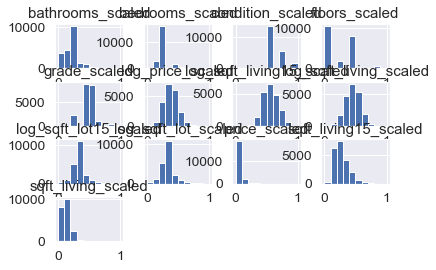

In [262]:
df_scaled.hist()

In [263]:
df_model_scaled = pd.DataFrame([])
df_model_scaled = pd.concat([features, price_log, df_scaled], axis=1)

to_drop = ["price", "price_log", "price_scaled", "condition","bedrooms", "bathrooms", "sqft_living", "floors", "grade", "sqft_basement", "sqft_living15", "sqft_lot", "sqft_lot15", "sqft_living_scaled", "sqft_living15_scaled", "log_sqft_living", "log_sqft_living15", "log_sqft_lot", "log_sqft_lot15"]
df_model_scaled = df_model_scaled.drop(to_drop, axis = 1)

df_model_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21142 entries, 0 to 21596
Data columns (total 12 columns):
zipcode                     21142 non-null object
basement_bool               21142 non-null bool
bedrooms_scaled             21142 non-null float64
bathrooms_scaled            21142 non-null float64
floors_scaled               21142 non-null float64
grade_scaled                21142 non-null float64
condition_scaled            21142 non-null float64
log_sqft_living_scaled      21142 non-null float64
log_sqft_living15_scaled    21142 non-null float64
log_sqft_lot_scaled         21142 non-null float64
log_sqft_lot15_scaled       21142 non-null float64
log_price_scaled            21142 non-null float64
dtypes: bool(1), float64(10), object(1)
memory usage: 2.0+ MB


In [264]:
df_model_scaled = pd.get_dummies(df_model_scaled)

In [266]:
#Define the problem
outcome = 'log_price_scaled'
predictors = df_model_scaled.drop('log_price_scaled', axis=1)

In [267]:
#fitting model
predictors = '+'.join(predictors)
formula = outcome + "~" + predictors
model_scaled = ols(formula=formula, data=df_model_scaled).fit()
model_scaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_price_scaled   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1711.
Date:                Wed, 19 Jun 2019   Prob (F-statistic):               0.00
Time:                        19:35:53   Log-Likelihood:                 36967.
No. Observations:               21142   AIC:                        -7.377e+04
Df Residuals:                   21062   BIC:                        -7.314e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.0028      0.002      1.223      0.221      -0.002       0.007
basement_bool[T.True]       -0.0069      0.001     -8.887      0.000      -0.008      -0.005
bedrooms_scaled             -0.0514      0.004    -11.667      0.000      -0.060      -0.043
bathrooms_scaled             0.0707      0.005     14.237      0.000       0.061       0.080
floors_scaled               -0.0052      0.002     -2.530      0.011      -0.009      -0.001
grade_scaled                 0.2255      0.004     50.692      0.000       0.217       0.234
condition_scaled             0.0477      0.002     24.655      0.000       0.044       0.052
log_sqft_living_scaled       0.3228      0.006     53.654      0.000       0.311       0.335
log_sqft_living15_scaled     0.1176      0.004     27.674      0.000       0.109       0.126
log_sqft_lot_scaled          0.1407      0.007     20.671      0.000       0.127       0.154
log_sqft_lot15_scaled       -0.0246      0.007     -3.625      0.000      -0.038      -0.011
zipcode_98001               -0.1085      0.002    -48.283      0.000      -0.113      -0.104
zipcode_98002               -0.1036      0.003    -34.508      0.000      -0.109      -0.098
zipcode_98003               -0.1037      0.003    -40.804      0.000      -0.109      -0.099
zipcode_98004                0.1361      0.002     56.532      0.000       0.131       0.141
zipcode_98005                0.0436      0.003     13.337      0.000       0.037       0.050
zipcode_98006                0.0320      0.002     16.280      0.000       0.028       0.036
zipcode_98007                0.0302      0.004      8.490      0.000       0.023       0.037
zipcode_98008                0.0416      0.003     16.436      0.000       0.037       0.047
zipcode_98010               -0.0576      0.004    -13.540      0.000      -0.066      -0.049
zipcode_98011               -0.0150      0.003     -4.948      0.000      -0.021      -0.009
zipcode_98014               -0.0436      0.004    -11.279      0.000      -0.051      -0.036
zipcode_98019               -0.0427      0.003    -13.857      0.000      -0.049      -0.037
zipcode_98022               -0.0923      0.003    -32.683      0.000      -0.098      -0.087
zipcode_98023               -0.1150      0.002    -60.038      0.000      -0.119      -0.111
zipcode_98024               -0.0181      0.005     -3.803      0.000      -0.027      -0.009
zipcode_98027             5.599e-05      0.002      0.026      0.979      -0.004       0.004
zipcode_98028               -0.0191      0.003     -7.559      0.000      -0.024      -0.014
zipcode_98029                0.0211      0.002      8.717      0.000       0.016       0.026
zipcode_98030               -0.0990      0.003    -37.252      0.000      -0.104      -0.094
zipcode_98031 

#### Checking for Normality
* Ensure that our residuals are normally distributed with a Q-Q plot

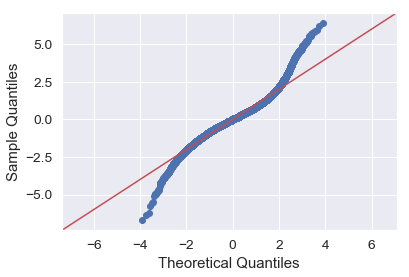

In [268]:
fig = sm.graphics.qqplot(model_scaled.resid, dist=stats.norm, line='45', fit=True)

In [269]:
X = df_model_scaled.drop('log_price_scaled', axis=1)
y = pd.DataFrame(df_model_scaled, columns= ["log_price_scaled"])

### Train-Test-Split (should do before modeling)

In [270]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [271]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [272]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16913 4229 16913 4229


In [273]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [274]:
#look at the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [275]:
#compare MSE of train and test set
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.0017733114370107495
Test Mean Squarred Error: 0.001779809917262503


#### Checking for Homoscedasticity
*Check that the errors do not display heteroscedasticity; if errors appear to increase or decrease based on the target variable, then the model does not meet the initial assumptions

In [1]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_scaled, 'log_price_scaled', fig=fig)
plt.show()

NameError: name 'plt' is not defined

In [294]:
features.head()

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_basement,zipcode,sqft_living15,log_sqft_living,log_sqft_living15,basement_bool
0,221900.0,3,1.00,1180,1.0,7,0.0,98178,1340,7.073270,7.200425,False
1,538000.0,3,2.25,2570,2.0,7,400.0,98125,1690,7.851661,7.432484,True
2,180000.0,2,1.00,770,1.0,6,0.0,98028,2720,6.646391,7.908387,False
3,604000.0,4,3.00,1960,1.0,7,910.0,98136,1360,7.580700,7.215240,True
4,510000.0,3,2.00,1680,1.0,8,0.0,98074,1800,7.426549,7.495542,False


In [287]:
df_model_scaled2 = pd.DataFrame([])
df_model_scaled2 = pd.concat([features, price_log, df_scaled], axis=1)

to_drop = ["price", "price_log", "log_price_scaled", "condition","bedrooms", "bathrooms", "sqft_living", "floors", "grade", "sqft_basement", "sqft_living15", "sqft_lot", "sqft_lot15", "sqft_living_scaled", "sqft_living15_scaled", "log_sqft_living", "log_sqft_living15", "log_sqft_lot", "log_sqft_lot15"]
df_model_scaled2 = df_model_scaled2.drop(to_drop, axis = 1)

df_model_scaled2.head()

,zipcode,basement_bool,bedrooms_scaled,bathrooms_scaled,floors_scaled,grade_scaled,condition_scaled,log_sqft_living_scaled,log_sqft_living15_scaled,log_sqft_lot_scaled,log_sqft_lot15_scaled,price_scaled
0,98178,False,0.2,0.066667,0.0,0.4,0.5,0.322166,0.441342,0.295858,0.300162,0.018880
1,98125,True,0.2,0.233333,0.4,0.4,0.5,0.538392,0.525882,0.326644,0.342058,0.060352
2,98028,False,0.1,0.066667,0.0,0.3,0.5,0.203585,0.699256,0.366664,0.349544,0.013382
3,98136,True,0.3,0.333333,0.0,0.4,1.0,0.463123,0.446739,0.280700,0.283185,0.069011
4,98074,False,0.2,0.200000,0.0,0.5,0.5,0.420302,0.548854,0.340224,0.339562,0.056678


In [290]:
df_model_scaled2 = pd.get_dummies(df_model_scaled2)

In [291]:
#Define the problem
outcome = 'price_scaled'
predictors = df_model_scaled2.drop('price_scaled', axis=1)

In [292]:
#fitting model
predictors = '+'.join(predictors)
formula = outcome + "~" + predictors
model_scaled2 = ols(formula=formula, data=df_model_scaled2).fit()
model_scaled2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           price_scaled   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     667.6
Date:                Wed, 19 Jun 2019   Prob (F-statistic):               0.00
Time:                        19:48:04   Log-Likelihood:                 47328.
No. Observations:               21142   AIC:                        -9.450e+04
Df Residuals:                   21062   BIC:                        -9.386e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.0870      0.001    -62.143      0.000      -0.090      -0.084
basement_bool[T.True]       -0.0039      0.000     -8.334      0.000      -0.005      -0.003
bedrooms_scaled             -0.0280      0.003    -10.357      0.000      -0.033      -0.023
bathrooms_scaled             0.0649      0.003     21.326      0.000       0.059       0.071
floors_scaled               -0.0107      0.001     -8.495      0.000      -0.013      -0.008
grade_scaled                 0.1291      0.003     47.378      0.000       0.124       0.134
condition_scaled             0.0179      0.001     15.101      0.000       0.016       0.020
log_sqft_living_scaled       0.0920      0.004     24.955      0.000       0.085       0.099
log_sqft_living15_scaled     0.0253      0.003      9.726      0.000       0.020       0.030
log_sqft_lot_scaled          0.0649      0.004     15.567      0.000       0.057       0.073
log_sqft_lot15_scaled       -0.0062      0.004     -1.478      0.140      -0.014       0.002
zipcode_98001               -0.0322      0.001    -23.393      0.000      -0.035      -0.029
zipcode_98002               -0.0226      0.002    -12.268      0.000      -0.026      -0.019
zipcode_98003               -0.0337      0.002    -21.621      0.000      -0.037      -0.031
zipcode_98004                0.0744      0.001     50.475      0.000       0.072       0.077
zipcode_98005                0.0045      0.002      2.224      0.026       0.001       0.008
zipcode_98006                0.0063      0.001      5.208      0.000       0.004       0.009
zipcode_98007               -0.0017      0.002     -0.785      0.433      -0.006       0.003
zipcode_98008                0.0075      0.002      4.843      0.000       0.004       0.011
zipcode_98010               -0.0246      0.003     -9.420      0.000      -0.030      -0.019
zipcode_98011               -0.0168      0.002     -9.082      0.000      -0.020      -0.013
zipcode_98014               -0.0209      0.002     -8.813      0.000      -0.026      -0.016
zipcode_98019               -0.0231      0.002    -12.210      0.000      -0.027      -0.019
zipcode_98022               -0.0320      0.002    -18.531      0.000      -0.035      -0.029
zipcode_98023               -0.0360      0.001    -30.679      0.000      -0.038      -0.034
zipcode_98024               -0.0138      0.003     -4.739      0.000      -0.020      -0.008
zipcode_98027               -0.0107      0.001     -8.247      0.000      -0.013      -0.008
zipcode_98028               -0.0158      0.002    -10.193      0.000      -0.019      -0.013
zipcode_98029               -0.0061      0.001     -4.085      0.000      -0.009      -0.003
zipcode_98030               -0.0322      0.002    -19.796      0.000      -0.035      -0.029
zipcode_98031 

#### Checking for Normality
* Ensure that our residuals are normally distributed with a Q-Q plot

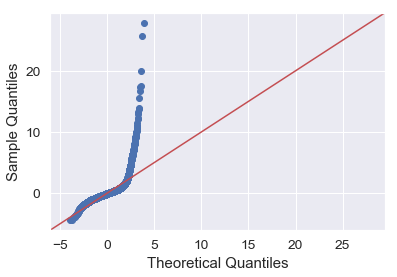

In [293]:
fig = sm.graphics.qqplot(model_scaled2.resid, dist=stats.norm, line='45', fit=True)

In [294]:
X = df_model_scaled2.drop('price_scaled', axis=1)
y = pd.DataFrame(df_model_scaled2, columns= ["price_scaled"])

### Train-Test-Split (should do before modeling)

In [295]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [296]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [297]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16913 4229 16913 4229


In [298]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [299]:
#look at the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [300]:
#compare MSE of train and test set
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.0006754910725263696
Test Mean Squarred Error: 0.0006283741780391484


Model excluding extreme outliers

Perhaps I should have removed some outliers from my data..

In [42]:
df['bedrooms'].value_counts()

3     9639
4     6740
2     2691
5     1560
6      262
1      191
7       36
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

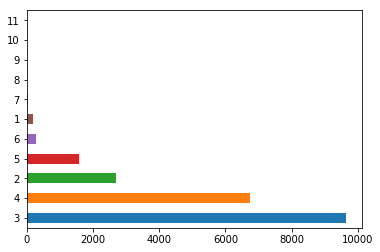

In [43]:
fig, ax = plt.subplots()
df['bedrooms'].value_counts().plot(ax=ax, kind='barh');

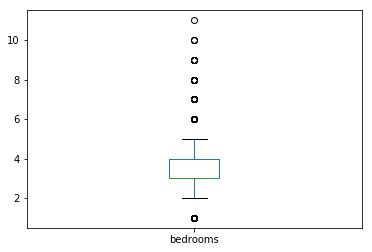

In [44]:
df['bedrooms'].plot.box();

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


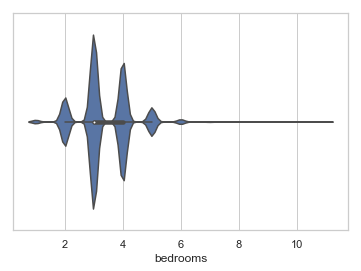

In [47]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=df["bedrooms"])

We have the most data about houses with 2 - 5 bedrooms, meaning our model wil probably do a bad job of predicting the price of houses that have less than 2 or more than 5 bedrooms. I may remove outliers from the data, or use binning.

In [381]:
df=df[(df['bedrooms']<= 5) & (df['bedrooms']>=2)]

In [302]:
df['bathrooms'].value_counts()

2.50    5029
1.75    2675
1.00    2100
2.25    1877
2.00    1645
1.50    1116
2.75    1106
3.50     695
3.00     671
3.25     552
3.75     136
4.00     116
4.50      71
4.25      69
4.75      18
0.75      18
5.00      13
5.25       9
5.50       8
1.25       4
6.00       4
5.75       3
6.25       2
6.75       1
6.50       1
Name: bathrooms, dtype: int64

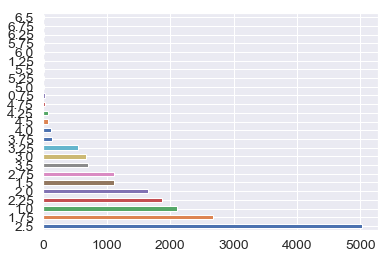

In [303]:
fig, ax = plt.subplots()
df['bathrooms'].value_counts().plot(ax=ax, kind='barh');

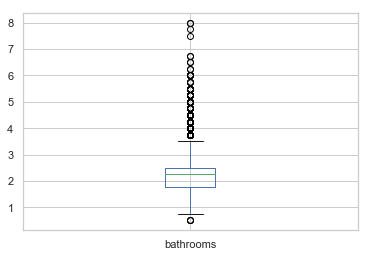

In [50]:
df['bathrooms'].plot.box();

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


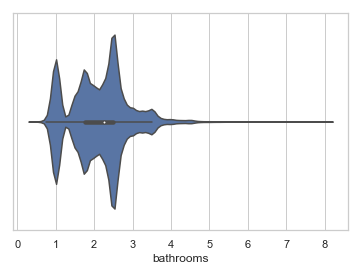

In [51]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=df["bathrooms"])

We have the most data about houses with .75 - 3.5 bedrooms, meaning our model wil probably do a bad job of predicting the price of houses that have less than .75 or more than 3.5 bathrooms. I may remove outliers from the data, or use binning.

In [382]:
df=df[(df['bathrooms']<= .75) & (df['bedrooms']>=2)]

In [385]:
#min-max scale all numerical predictors so they are between 0 and 1

bedrooms = df["bedrooms"]
bathrooms = df["bathrooms"]
sqft_living = df["sqft_living"]
floors = df["floors"]
grade = df["grade"]
condition = df["condition"]
sqft_living15 = df["sqft_living15"]
log_sqft_living = features_transformed["log_sqft_living"]
log_sqft_living15 = features_transformed["log_sqft_living15"]
log_sqft_lot = features_transformed["log_sqft_lot"]
log_sqft_lot15 = features_transformed["log_sqft_lot15"]

scaled_bedrooms = (bedrooms-min(bedrooms))/(max(bedrooms)-min(bedrooms))
scaled_bathrooms = (bathrooms-min(bathrooms))/(max(bathrooms)-min(bathrooms))
scaled_sqft_living = (sqft_living-min(sqft_living))/(max(sqft_living)-min(sqft_living))
scaled_floors = (floors-min(floors))/(max(floors)-min(floors))
scaled_grade = (grade-min(grade))/(max(grade)-min(grade))
scaled_condition = (condition-min(condition))/(max(condition)-min(condition))
scaled_sqft_living15 = (sqft_living15-min(sqft_living15))/(max(sqft_living15)-min(sqft_living15))
scaled_log_sqft_living = (log_sqft_living-min(log_sqft_living))/(max(log_sqft_living)-min(log_sqft_living))
scaled_log_sqft_living15 = (log_sqft_living15-min(log_sqft_living15))/(max(log_sqft_living15)-min(log_sqft_living15))
scaled_log_sqft_lot = (log_sqft_lot-min(log_sqft_lot))/(max(log_sqft_lot)-min(log_sqft_lot))
scaled_log_sqft_lot15 = (log_sqft_lot15-min(log_sqft_lot15))/(max(log_sqft_lot15)-min(log_sqft_lot15))



df_scaled = pd.DataFrame([])
df_scaled["bedrooms_scaled"] = scaled_bedrooms
df_scaled["bathrooms_scaled"] = scaled_bathrooms
df_scaled["sqft_living_scaled"] = scaled_sqft_living
df_scaled["floors_scaled"] = scaled_floors
df_scaled["grade_scaled"] = scaled_grade
df_scaled["condition_scaled"] = scaled_condition
df_scaled["sqft_living15_scaled"] = scaled_sqft_living15
df_scaled["log_sqft_living_scaled"] = scaled_log_sqft_living
df_scaled["log_sqft_living15_scaled"] = scaled_log_sqft_living15
df_scaled["log_sqft_lot_scaled"] = scaled_log_sqft_lot
df_scaled["log_sqft_lot15_scaled"] = scaled_log_sqft_lot15


price = df["price"]
scaled_price = (price-min(price))/(max(price)-min(price))
df_scaled["price_scaled"] = scaled_price


price_log = pd.DataFrame([])
price_log['price_log'] = np.log(df['price'])
price_log = price_log["price_log"]
scaled_log_price = (price_log-min(price_log))/(max(price_log)-min(price_log))
df_scaled["log_price_scaled"] = scaled_log_price

df_scaled.head()

,bedrooms_scaled,bathrooms_scaled,sqft_living_scaled,floors_scaled,grade_scaled,condition_scaled,sqft_living15_scaled,log_sqft_living_scaled,log_sqft_living15_scaled,log_sqft_lot_scaled,log_sqft_lot15_scaled,price_scaled,log_price_scaled
208,0.0,1.0,0.222222,0.0,0.666667,0.333333,0.214592,0.246921,0.416013,0.361601,0.428956,0.117153,0.285936
569,0.0,1.0,0.347826,0.0,0.666667,0.666667,0.480687,0.317418,0.562753,0.417189,0.508655,0.445255,0.678820
1166,0.0,1.0,0.000000,0.0,0.333333,0.666667,0.055794,0.048132,0.288151,0.343749,0.513729,0.277372,0.516721
1482,0.5,1.0,0.231884,0.0,0.666667,1.000000,0.176824,0.253027,0.389419,0.455156,0.615520,0.627737,0.809365
2259,0.0,0.0,0.357488,0.0,0.666667,0.666667,0.270386,0.322166,0.452057,0.335052,0.364461,0.252555,0.487404


In [386]:
df_model_scaled2 = pd.DataFrame([])
df_model_scaled2 = pd.concat([features, price_log, df_scaled], axis=1)

to_drop = ["price", "price_log", "log_price_scaled", "condition","bedrooms", "bathrooms", "sqft_living", "floors", "grade", "sqft_basement", "sqft_living15", "sqft_lot", "sqft_lot15", "sqft_living_scaled", "sqft_living15_scaled", "log_sqft_living", "log_sqft_living15", "log_sqft_lot", "log_sqft_lot15"]
df_model_scaled2 = df_model_scaled2.drop(to_drop, axis = 1)

df_model_scaled2.head()

,zipcode,basement_bool,bedrooms_scaled,bathrooms_scaled,floors_scaled,grade_scaled,condition_scaled,log_sqft_living_scaled,log_sqft_living15_scaled,log_sqft_lot_scaled,log_sqft_lot15_scaled,price_scaled
0,98178,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98125,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,98028,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,98136,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,98074,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [338]:
df_model_scaled2 = pd.get_dummies(df_model_scaled2)

In [291]:
#Define the problem
outcome = 'price_scaled'
predictors = df_model_scaled2.drop('price_scaled', axis=1)

In [292]:
#fitting model
predictors = '+'.join(predictors)
formula = outcome + "~" + predictors
model_scaled2 = ols(formula=formula, data=df_model_scaled2).fit()
model_scaled2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           price_scaled   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     667.6
Date:                Wed, 19 Jun 2019   Prob (F-statistic):               0.00
Time:                        19:48:04   Log-Likelihood:                 47328.
No. Observations:               21142   AIC:                        -9.450e+04
Df Residuals:                   21062   BIC:                        -9.386e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.0870      0.001    -62.143      0.000      -0.090      -0.084
basement_bool[T.True]       -0.0039      0.000     -8.334      0.000      -0.005      -0.003
bedrooms_scaled             -0.0280      0.003    -10.357      0.000      -0.033      -0.023
bathrooms_scaled             0.0649      0.003     21.326      0.000       0.059       0.071
floors_scaled               -0.0107      0.001     -8.495      0.000      -0.013      -0.008
grade_scaled                 0.1291      0.003     47.378      0.000       0.124       0.134
condition_scaled             0.0179      0.001     15.101      0.000       0.016       0.020
log_sqft_living_scaled       0.0920      0.004     24.955      0.000       0.085       0.099
log_sqft_living15_scaled     0.0253      0.003      9.726      0.000       0.020       0.030
log_sqft_lot_scaled          0.0649      0.004     15.567      0.000       0.057       0.073
log_sqft_lot15_scaled       -0.0062      0.004     -1.478      0.140      -0.014       0.002
zipcode_98001               -0.0322      0.001    -23.393      0.000      -0.035      -0.029
zipcode_98002               -0.0226      0.002    -12.268      0.000      -0.026      -0.019
zipcode_98003               -0.0337      0.002    -21.621      0.000      -0.037      -0.031
zipcode_98004                0.0744      0.001     50.475      0.000       0.072       0.077
zipcode_98005                0.0045      0.002      2.224      0.026       0.001       0.008
zipcode_98006                0.0063      0.001      5.208      0.000       0.004       0.009
zipcode_98007               -0.0017      0.002     -0.785      0.433      -0.006       0.003
zipcode_98008                0.0075      0.002      4.843      0.000       0.004       0.011
zipcode_98010               -0.0246      0.003     -9.420      0.000      -0.030      -0.019
zipcode_98011               -0.0168      0.002     -9.082      0.000      -0.020      -0.013
zipcode_98014               -0.0209      0.002     -8.813      0.000      -0.026      -0.016
zipcode_98019               -0.0231      0.002    -12.210      0.000      -0.027      -0.019
zipcode_98022               -0.0320      0.002    -18.531      0.000      -0.035      -0.029
zipcode_98023               -0.0360      0.001    -30.679      0.000      -0.038      -0.034
zipcode_98024               -0.0138      0.003     -4.739      0.000      -0.020      -0.008
zipcode_98027               -0.0107      0.001     -8.247      0.000      -0.013      -0.008
zipcode_98028               -0.0158      0.002    -10.193      0.000      -0.019      -0.013
zipcode_98029               -0.0061      0.001     -4.085      0.000      -0.009      -0.003
zipcode_98030               -0.0322      0.002    -19.796      0.000      -0.035      -0.029
zipcode_98031 

#### Checking for Normality
* Ensure that our residuals are normally distributed with a Q-Q plot

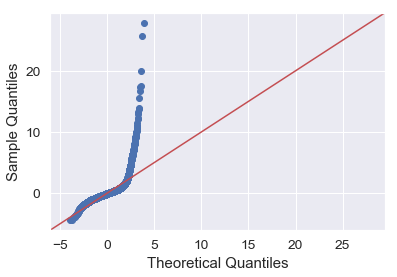

In [293]:
fig = sm.graphics.qqplot(model_scaled2.resid, dist=stats.norm, line='45', fit=True)

In [294]:
X = df_model_scaled2.drop('price_scaled', axis=1)
y = pd.DataFrame(df_model_scaled2, columns= ["price_scaled"])

### Train-Test-Split (should do before modeling)

In [295]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [296]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [297]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16913 4229 16913 4229


In [298]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [299]:
#look at the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [300]:
#compare MSE of train and test set
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.0006754910725263696
Test Mean Squarred Error: 0.0006283741780391484


In [236]:
#not working
#plt.scatter(model_1.predict(df_model_1[predictors]), model_1.resid)
#plt.plot(model_1.predict(df_model_1[predictors]), [0 for i in range(len(df_model_1))])

## Interpret & Visualize

* Draw conclusions from data, evaluate meaning of results, communicate the findings through visualizations

* log price - one "unit" change in predictor leads to 1% change in log price?

## Future Directions

* There's likely a lot that could be done with the latitude and longitude variables (proximity to work, located in a good school district, proximity to public transportation, close - but not too close - to a highway/main road...)
* Maybe dig into yr_built in relation to renovated? If "X" many years old, can increase price "X" much if you renovate? diff between yr_built and yr_reno
* what is "grade" really about? This is a very important feature in predicting price

Bad models and illogical rabbit holes I went down...

### Model with Latitude instead of zipcode

In [262]:
df_model_price_log_lat = pd.DataFrame([])
df_model_price_log_lat = pd.concat([price_log, features, df.lat], axis=1)
df_model_price_log_lat = df_model_price_log_lat.drop("price", axis = 1)
df_model_price_log_lat = df_model_price_log_lat.drop("zipcode", axis = 1)
df_model_price_log_lat = df_model_price_log_lat.drop("sqft_living", axis = 1)
df_model_price_log_lat = df_model_price_log_lat.drop("sqft_living15", axis = 1)
df_model_price_log_lat = df_model_price_log_lat.drop("sqft_basement", axis = 1)
df_model_price_log_lat.head()

,price_log,bedrooms,bathrooms,floors,grade,log_sqft_living,log_sqft_living15,basement_bool,lat
0,12.309982,3,1.00,1.0,7,7.073270,7.200425,False,47.5112
1,13.195614,3,2.25,2.0,7,7.851661,7.432484,True,47.7210
2,12.100712,2,1.00,1.0,6,6.646391,7.908387,False,47.7379
3,13.311329,4,3.00,1.0,7,7.580700,7.215240,True,47.5208
4,13.142166,3,2.00,1.0,8,7.426549,7.495542,False,47.6168


In [263]:
#Define the problem
outcome = 'price_log'
predictors = df_model_price_log_lat.drop('price_log', axis=1)

In [264]:
#fitting model
predictors = '+'.join(predictors)
formula = outcome + "~" + predictors
model_price_log_lat = ols(formula=formula, data=df_model_price_log_lat).fit()
model_price_log_lat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     6380.
Date:                Mon, 17 Jun 2019   Prob (F-statistic):               0.00
Time:                        14:40:58   Log-Likelihood:                -3459.2
No. Observations:               21142   AIC:                             6936.
Df Residuals:                   21133   BIC:                             7008.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -61.5511      0.694    -88.675      0.000     -62.912     -60.191
basement_bool[T.True]     0.0717      0.005     15.316      0.000       0.063       0.081
bedrooms                 -0.0217      0.003     -7.405      0.000      -0.027      -0.016
bathrooms                 0.0104      0.004      2.374      0.018       0.002       0.019
floors                    0.0021      0.005      0.434      0.664      -0.007       0.011
grade                     0.1555      0.003     54.281      0.000       0.150       0.161
log_sqft_living           0.3737      0.011     35.062      0.000       0.353       0.395
log_sqft_living15         0.2077      0.010     21.548      0.000       0.189       0.227
lat                       1.4516      0.015     99.997      0.000       1.423       1.480
==============================================================================
Omnibus:                      720.295   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              942.122
Skew:                           0.380   Prob(JB):                    2.63e-205
Kurtosis:                       3.702   Cond. No.                     1.75e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Checking for Normality
* Ensure that our residuals are normally distributed with a Q-Q plot

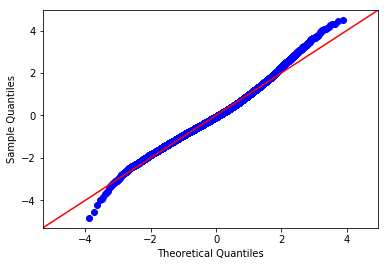

In [265]:
fig = sm.graphics.qqplot(model_price_log_lat.resid, dist=stats.norm, line='45', fit=True)

In [266]:
X = df_model_price_log_lat.drop('price_log', axis=1)
y = pd.DataFrame(df_model_price_log_lat, columns= ["price_log"])

### Holdout Validation
*How well the model will generalize to new data, i.e. the model learned the patters from the data correctly without taking into consideration the noise

### Train-Test-Split (should do before modeling)

In [267]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [268]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [269]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16913 4229 16913 4229


In [270]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [271]:
#look at the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [272]:
#compare MSE of train and test set
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.0813330550320756
Test Mean Squarred Error: 0.08078994693142218


Conclusions:
    
R^2 went down, and MSE went slightly up, but Q-Q plot looks much better

Interestingly, floors is no longer significant (pvalue = 0.664)

#### Let's rerun it taking the log of latitude so that it is more normal and let's drop floors

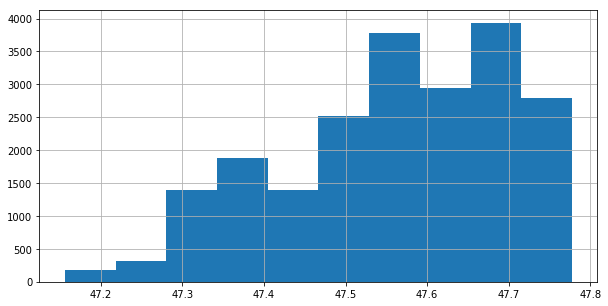

In [273]:
df_model_price_log_lat["lat"].hist(figsize = [10,5]);

In [274]:
lat_log = pd.DataFrame([])
lat_log['lat_log'] = np.log(df['lat'])

df_model_price_log_lat_nofloors = pd.DataFrame([])
df_model_price_log_lat_nofloors = pd.concat([price_log, features, lat_log], axis=1)

to_drop = ["price", "zipcode", "sqft_living", "sqft_living15", "sqft_basement", "floors"]
df_model_price_log_lat_nofloors = df_model_price_log_lat_nofloors.drop(to_drop, axis = 1)

df_model_price_log_lat_nofloors.head()

,price_log,bedrooms,bathrooms,grade,log_sqft_living,log_sqft_living15,basement_bool,lat_log
0,12.309982,3,1.00,7,7.073270,7.200425,False,3.860965
1,13.195614,3,2.25,7,7.851661,7.432484,True,3.865372
2,12.100712,2,1.00,6,6.646391,7.908387,False,3.865726
3,13.311329,4,3.00,7,7.580700,7.215240,True,3.861168
4,13.142166,3,2.00,8,7.426549,7.495542,False,3.863186


In [275]:
df_model_price_log_lat_nofloors.describe()

,price_log,bedrooms,bathrooms,grade,log_sqft_living,log_sqft_living15,lat_log
count,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000
mean,13.048412,3.371157,2.116096,7.658310,7.551057,7.539832,3.861993
std,0.526662,0.902213,0.768545,1.174272,0.424029,0.327436,0.002916
min,11.264464,1.000000,0.500000,3.000000,5.913503,5.988961,3.853459
25%,12.682307,3.000000,1.750000,7.000000,7.265430,7.306531,3.860124
50%,13.017003,3.000000,2.250000,7.000000,7.554859,7.517521,3.862244
75%,13.377006,4.000000,2.500000,8.000000,7.843849,7.766417,3.864474
max,15.856731,11.000000,8.000000,13.000000,9.513404,8.733916,3.866557


/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


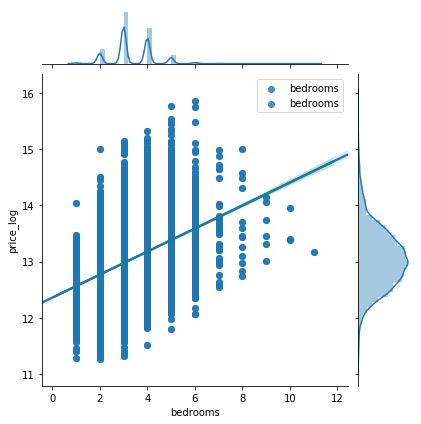

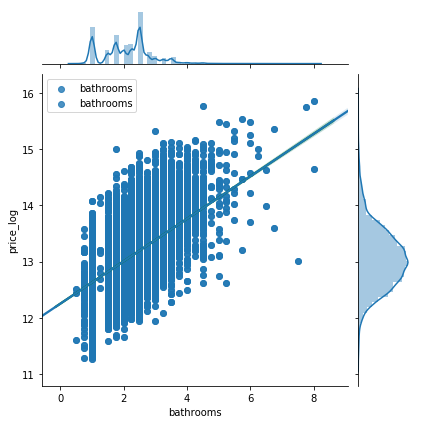

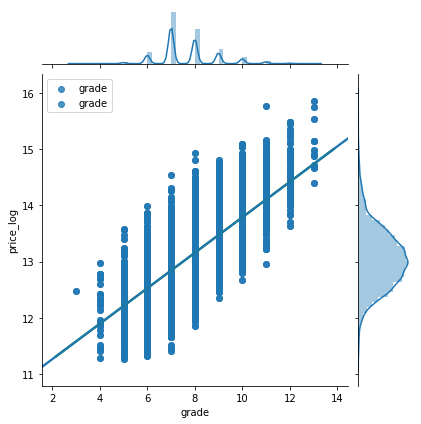

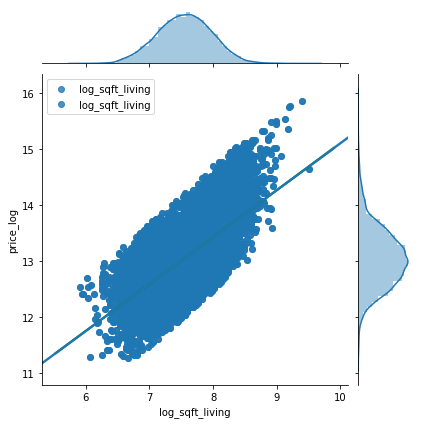

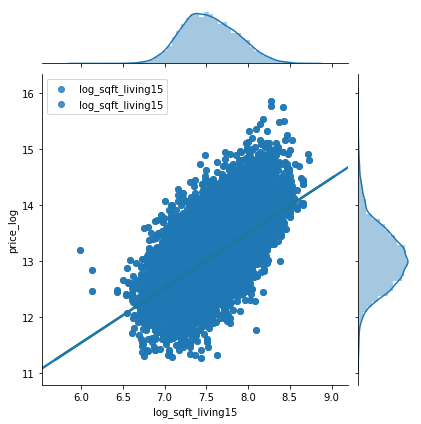

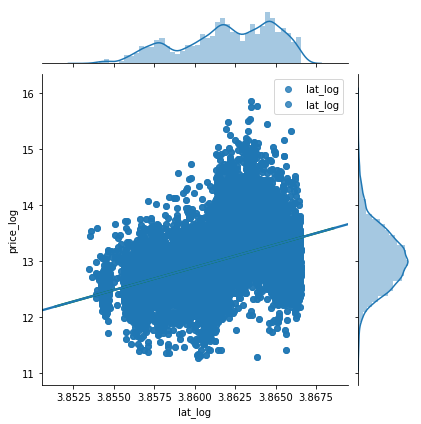

In [276]:
for column in ['bedrooms', 'bathrooms', 'grade', 'log_sqft_living', 'log_sqft_living15', 'lat_log']:
    sns.jointplot(x=column, y="price_log",
                 data=df_model_price_log_lat_nofloors,
                 kind='reg',
                 label=column,
                 joint_kws={'line_kws':{'color':'green'}})
    sns.regplot(df_model_price_log_lat_nofloors[column], df_model_price_log_lat_nofloors.price_log, label=column)
    plt.legend()
    plt.show()

In [277]:
#Define the problem
outcome = 'price_log'
predictors = df_model_price_log_lat_nofloors.drop('price_log', axis=1)

In [278]:
#fitting model
predictors = '+'.join(predictors)
formula = outcome + "~" + predictors
model_price_log_lat_nofloors = ols(formula=formula, data=df_model_price_log_lat_nofloors).fit()
model_price_log_lat_nofloors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     7297.
Date:                Mon, 17 Jun 2019   Prob (F-statistic):               0.00
Time:                        14:41:49   Log-Likelihood:                -3453.2
No. Observations:               21142   AIC:                             6922.
Df Residuals:                   21134   BIC:                             6986.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -259.2159      2.657    -97.545      0.000    -264.425    -254.007
basement_bool[T.True]     0.0708      0.004     16.461      0.000       0.062       0.079
bedrooms                 -0.0218      0.003     -7.465      0.000      -0.027      -0.016
bathrooms                 0.0111      0.004      2.711      0.007       0.003       0.019
grade                     0.1557      0.003     55.213      0.000       0.150       0.161
log_sqft_living           0.3741      0.011     35.164      0.000       0.353       0.395
log_sqft_living15         0.2071      0.010     21.710      0.000       0.188       0.226
lat_log                  69.0597      0.688    100.443      0.000      67.712      70.407
==============================================================================
Omnibus:                      719.069   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              940.740
Skew:                           0.379   Prob(JB):                    5.26e-205
Kurtosis:                       3.702   Cond. No.                     2.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Checking for Normality
* Ensure that our residuals are normally distributed with a Q-Q plot

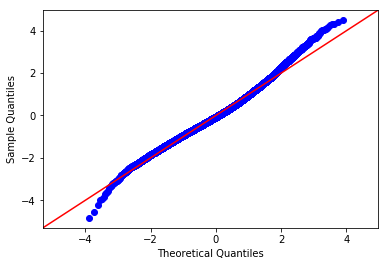

In [279]:
fig = sm.graphics.qqplot(model_price_log_lat_nofloors.resid, dist=stats.norm, line='45', fit=True)

In [280]:
X = df_model_price_log_lat_nofloors.drop('price_log', axis=1)
y = pd.DataFrame(df_model_price_log_lat_nofloors, columns= ["price_log"])

### Train-Test-Split (should do before modeling)

In [281]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [282]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [283]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16913 4229 16913 4229


In [284]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [285]:
#look at the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [286]:
#compare MSE of train and test set
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.08058747225319474
Test Mean Squarred Error: 0.08357776648324494


Conclusions:
    
No change in R^2, very little change in MSE, and Q-Q plot looks the same

At least now all of our predictors are significant.

Perhaps I should have standardized my features...